# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.90'

## Specifying filetype, and folder as before

In [60]:
# This specifies what file type your Raman exported in. 
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [61]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong'). After selecting one, go through and select another one and run again from here. 
batch='Medium' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')

### Now load one file from this group to tweak parameters for

In [62]:
Diad_Files =GroupN_df['filename']
i=0


### Lets plot the diad to have a look at it

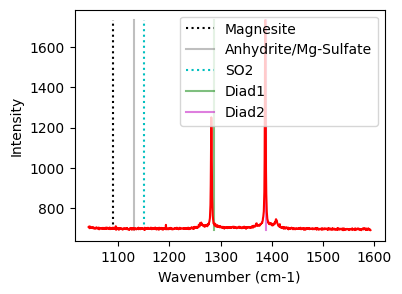

In [63]:
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [64]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [65]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1225, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240), upper_bck_diad1=(1315, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=557.8059097939604, HB_prom=nan, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0          1281.745743       1281.745743        0.007791       1660.715592   

   Diad1_Voigt_Sigma  Diad1_Voigt_Gamma  Diad1_Combofit_Height  \
0           0.959507                  0             562.054271   

   Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm        Diad1_refit  \
0         5.26406        0.957554    1.919014  Flagged Warnings:   

   Diad1_Asym50  Diad1_Asym70  Diad1_Yuan2017_sym_factor  \
0      1.077477      1.030266                    0.14868   

   Diad1_Remigi2021_BSF   Diad1_PDF_Model  
0              0.003414  PseudoVoigtModel

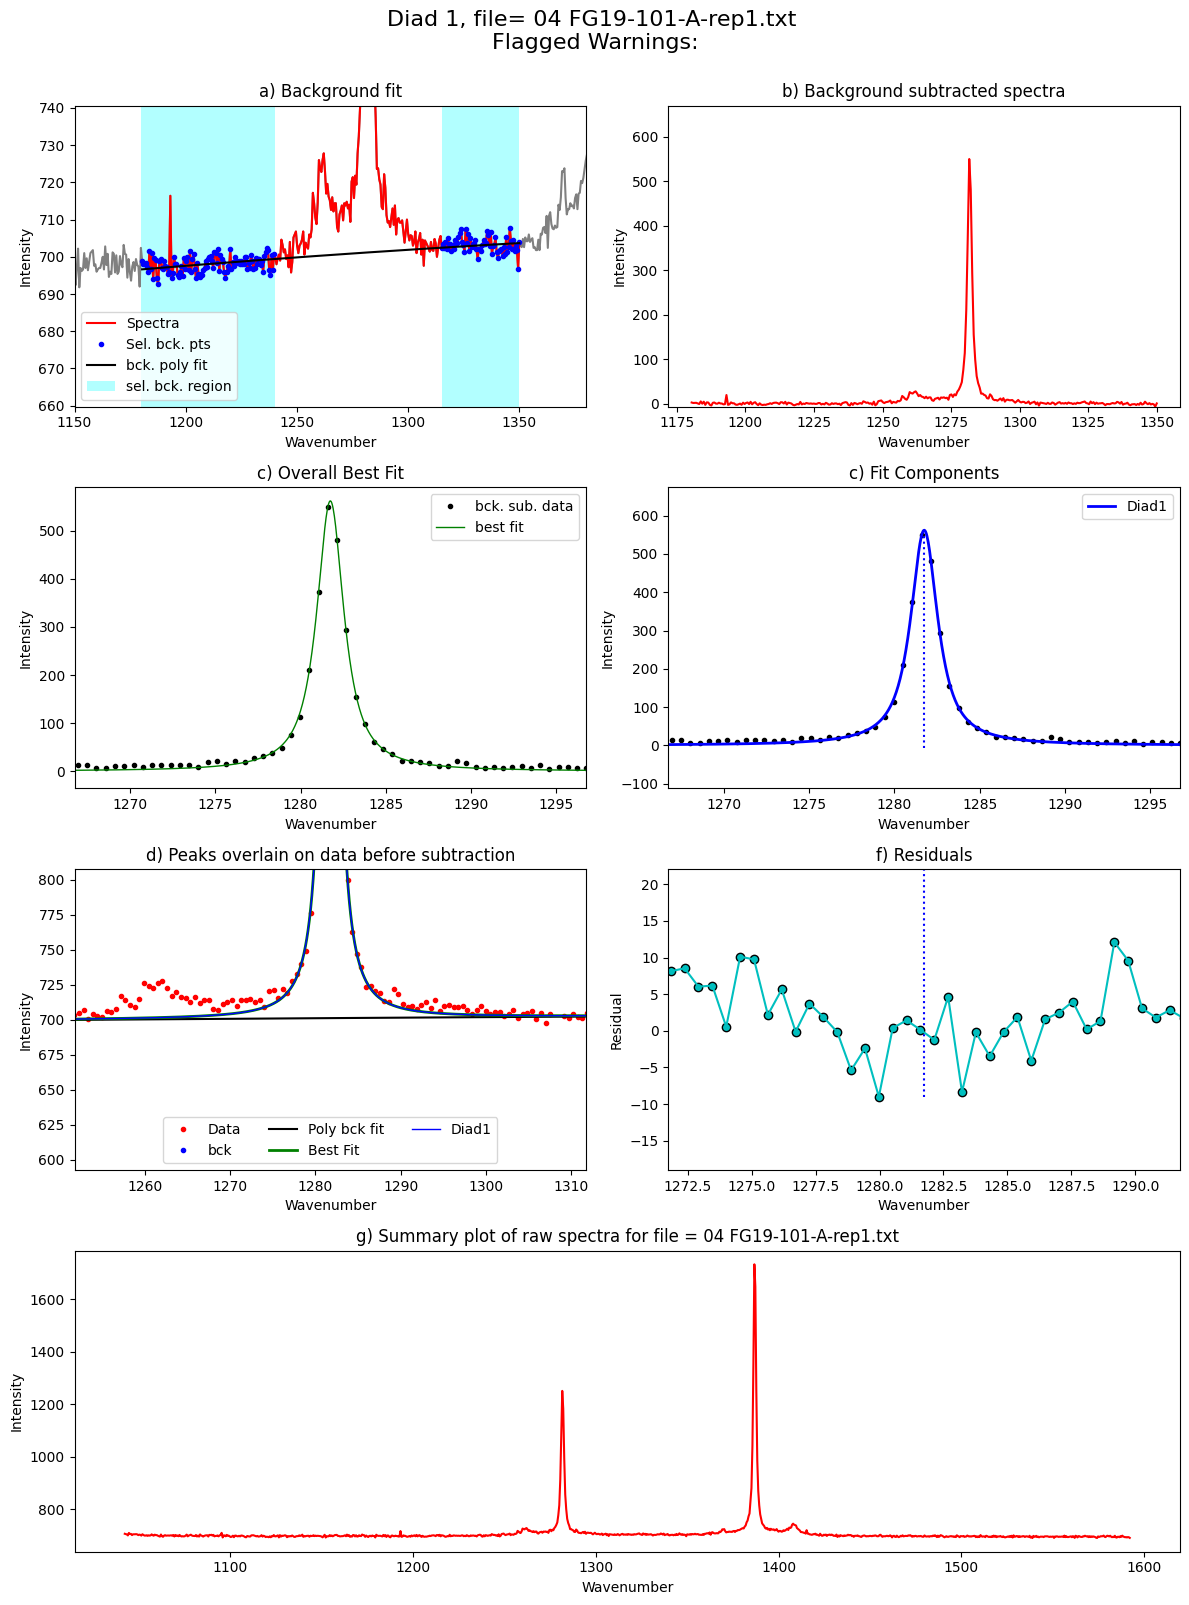

In [66]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=Diad_Files.iloc[0],
filetype=spectra_filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [67]:
diad1_fit_config2=diad1_fit_config_init

## Fit diad2

In [68]:
if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.4,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=3, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1350), upper_bck_diad2=(1440, 1470), fit_gauss=True, gauss_amp=94.98109530836041, diad_sigma=1, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=1063.1631719462084, HB_prom=47.490547654180205, C13_prom=nan, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False)

### See what these fit parameters look like for diad2

Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0          1386.920695       1386.920645        0.001926       2722.670265   

   Diad2_Voigt_Sigma  Diad2_Voigt_Gamma     HB2_Cent    HB2_Area  HB2_Sigma  \
0           0.875036                  0  1408.302237  280.563982   2.527786   

   Diad2_Combofit_Height  ...  Diad2_fwhm  Diad2_Gauss_Cent  Diad2_Gauss_Area  \
0            1078.712085  ...    1.750071        1386.85968        557.686944   

   Diad2_Gauss_Sigma        Diad2_refit  Diad2_Asym50 Diad2_Asym70  \
0          16.579553  Flagged Warnings:      1.060078     1.036988   

   Diad2_Yuan2017_sym_factor  Diad2_Remigi2021_BSF   Diad2_PDF_Model  
0                    0.10514              0.001622  PseudoVoigtModel  

[1 rows x 22 columns]

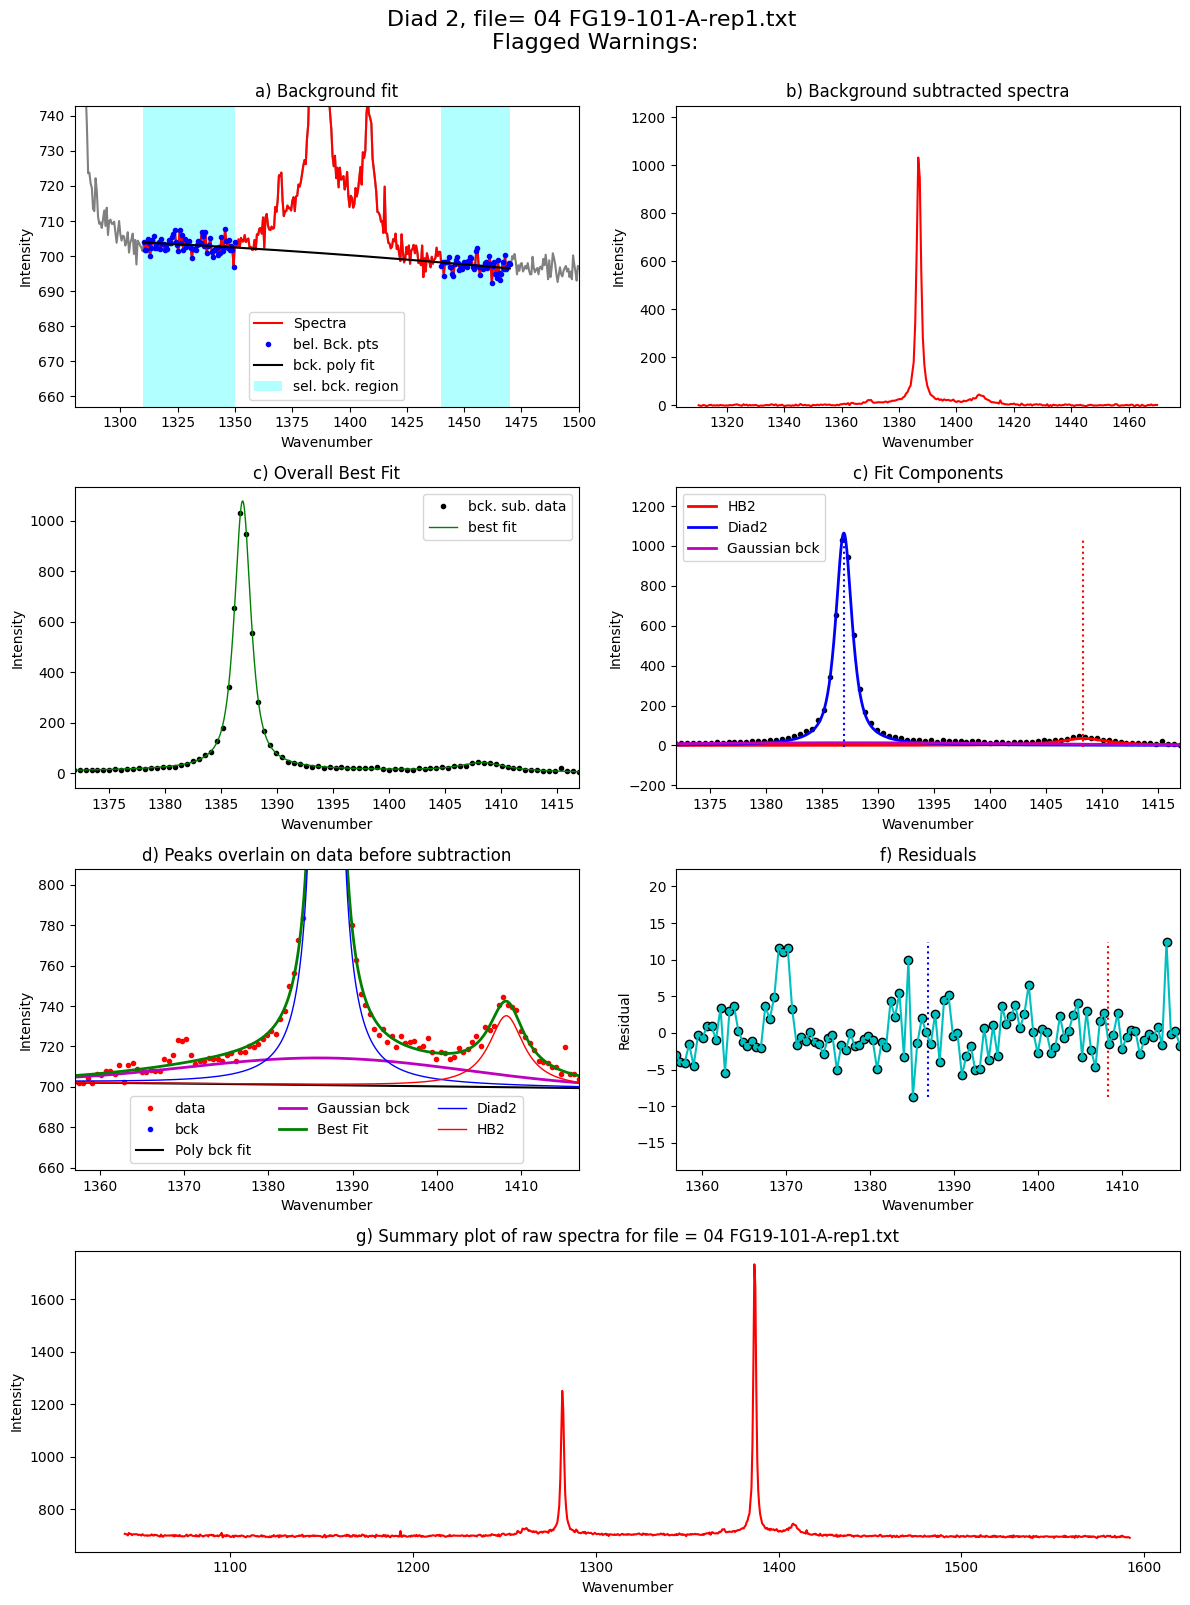

In [69]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

## Loop over all the files in the group
- This will loop over all the 

  0%|          | 0/13 [00:00<?, ?it/s]

Processing file: 04 FG19-101-A-rep1.txt


  8%|▊         | 1/13 [00:04<00:50,  4.23s/it]

Processing file: 05 FG19-101-A-rep2.txt


 15%|█▌        | 2/13 [00:08<00:47,  4.35s/it]

Processing file: 06 FG19-101-A-rep3_CRR_DiadFit.txt


 23%|██▎       | 3/13 [00:12<00:40,  4.00s/it]

Processing file: 15 186-11-121-A.txt


 31%|███       | 4/13 [00:16<00:35,  3.99s/it]

Processing file: 16 186-11-121-B.txt


 38%|███▊      | 5/13 [00:20<00:31,  3.98s/it]

Processing file: 17 186-11-121-C_CRR_DiadFit.txt


 46%|████▌     | 6/13 [00:24<00:27,  3.96s/it]

Processing file: 18 186-11-121-D-rep1_CRR_DiadFit.txt
refit attempt 1


 54%|█████▍    | 7/13 [00:29<00:25,  4.28s/it]

Processing file: 19 186-11-121-E.txt


 62%|██████▏   | 8/13 [00:32<00:20,  4.13s/it]

Processing file: 20 186-11-121-D-rep2.txt


 69%|██████▉   | 9/13 [00:37<00:16,  4.23s/it]

Processing file: 22 186-11-122-A.txt


 77%|███████▋  | 10/13 [00:41<00:12,  4.24s/it]c:\users\charl\documents\python dev\diadfit\src\DiadFit\diads.py:3106: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(12, 16))


Processing file: 23 186-11-122-B.txt


 85%|████████▍ | 11/13 [00:45<00:08,  4.08s/it]

Processing file: 26 187-9-116-A.txt


 92%|█████████▏| 12/13 [00:49<00:04,  4.10s/it]

Processing file: 36 187-9-120-A.txt


100%|██████████| 13/13 [00:53<00:00,  4.14s/it]


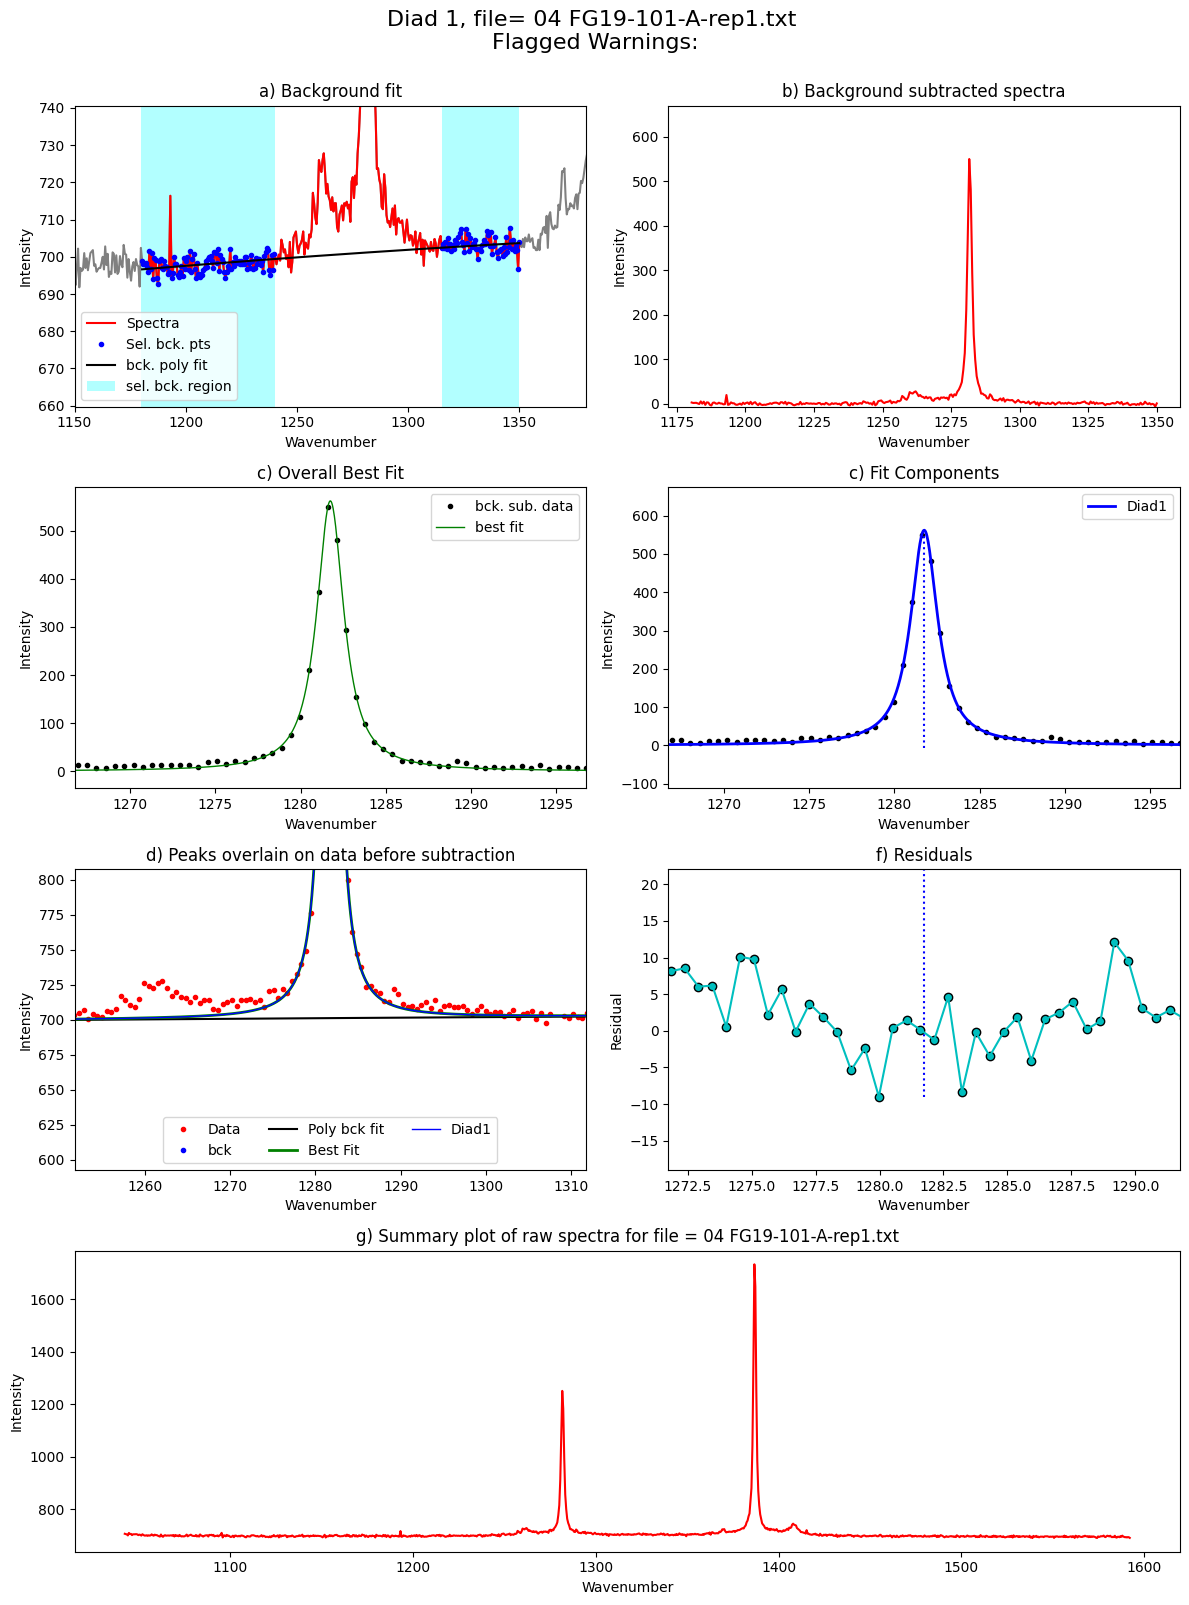

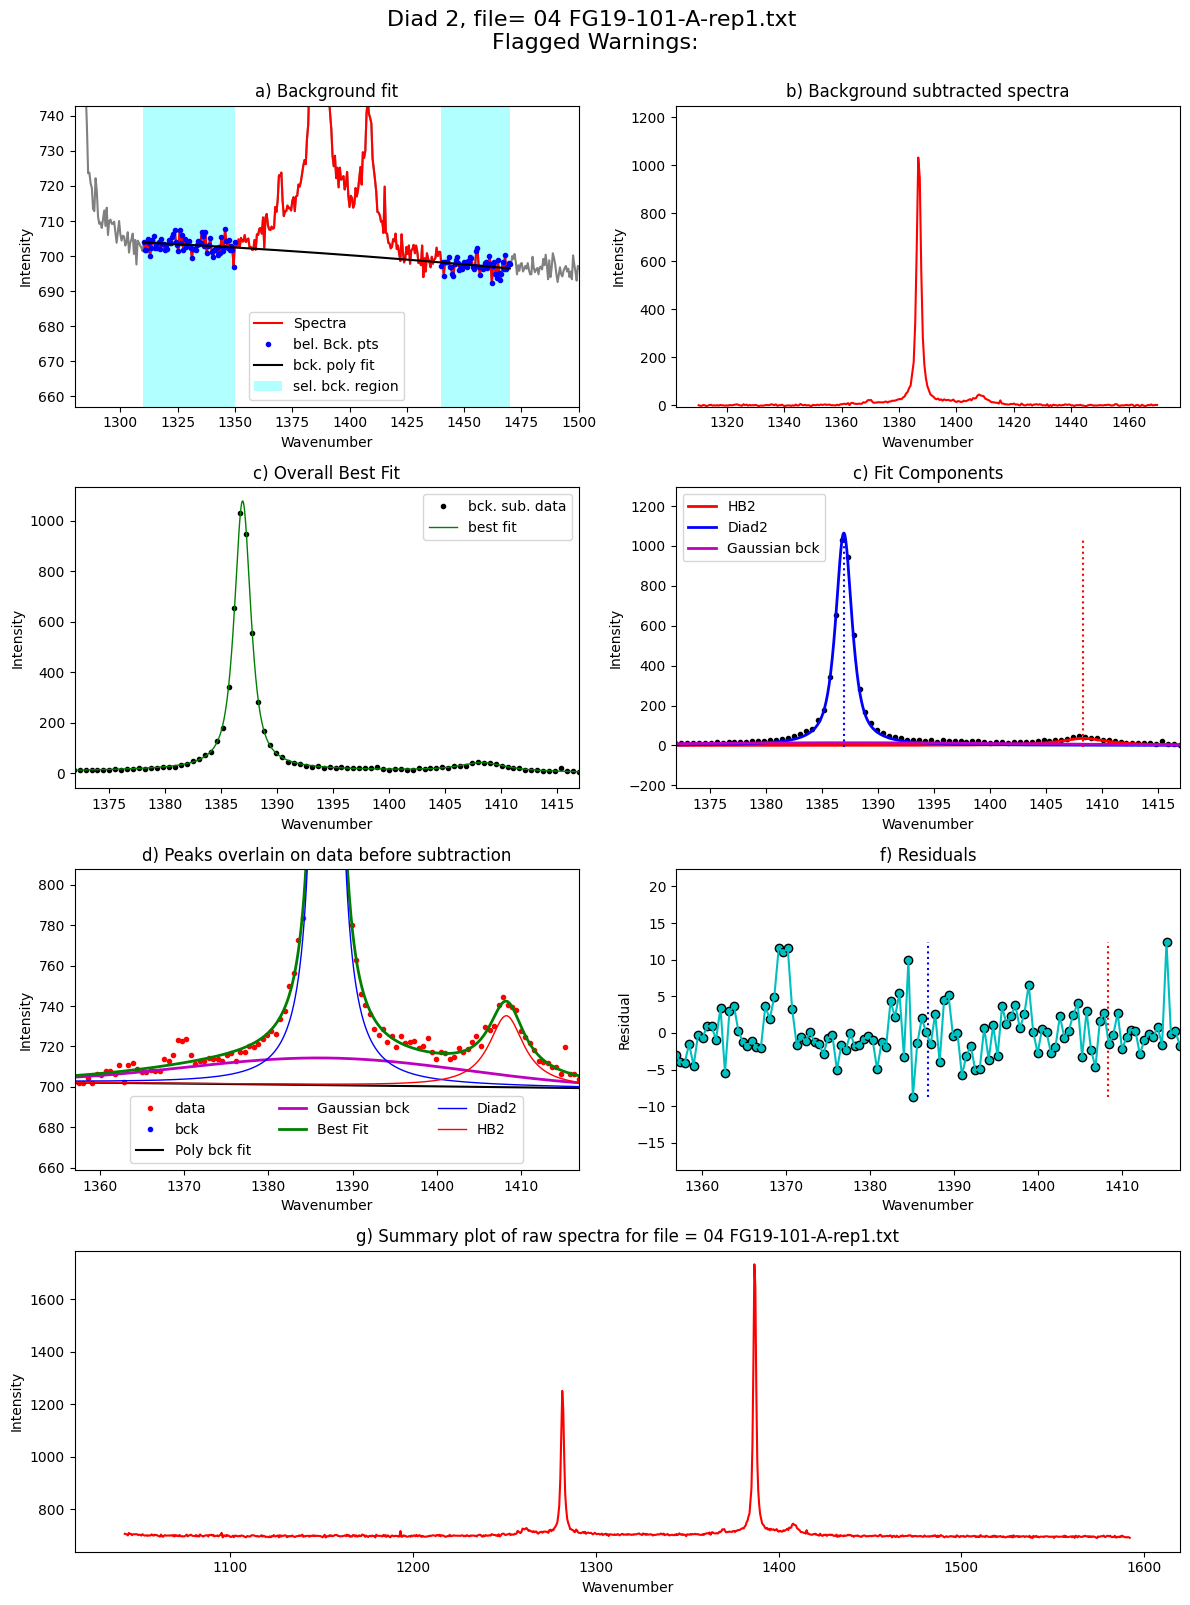

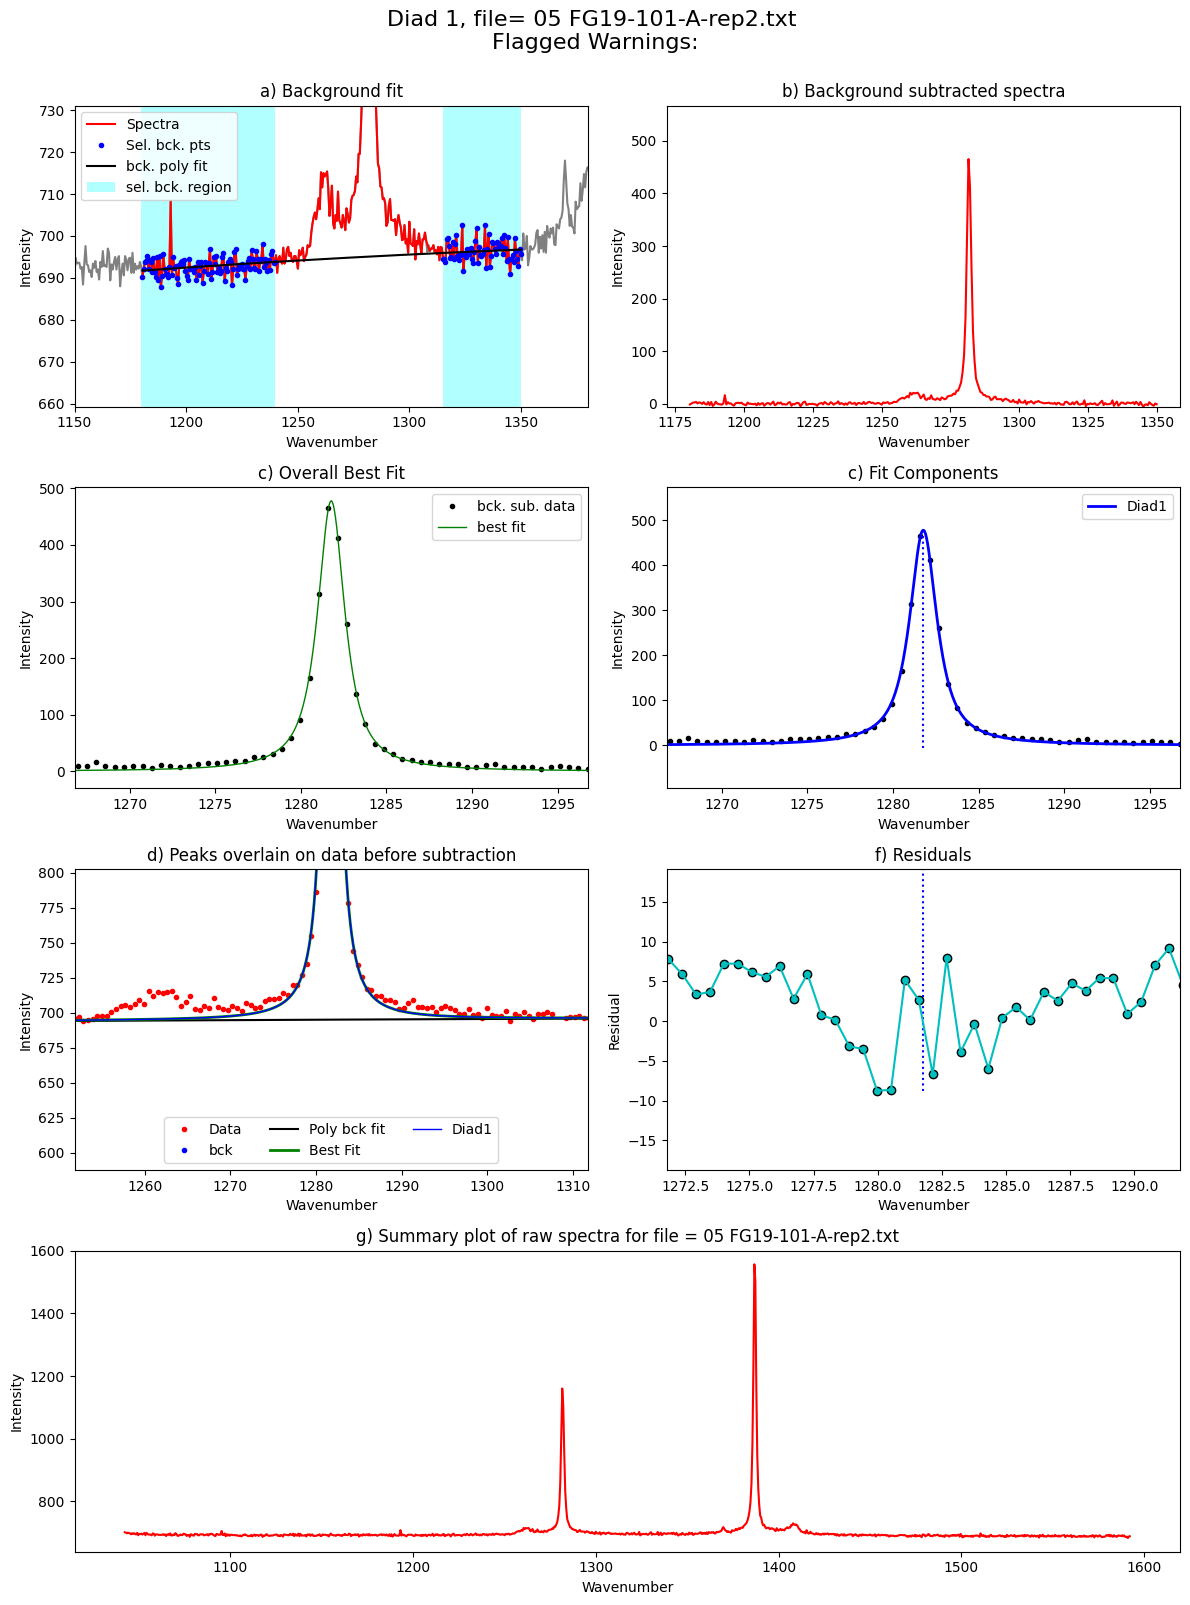

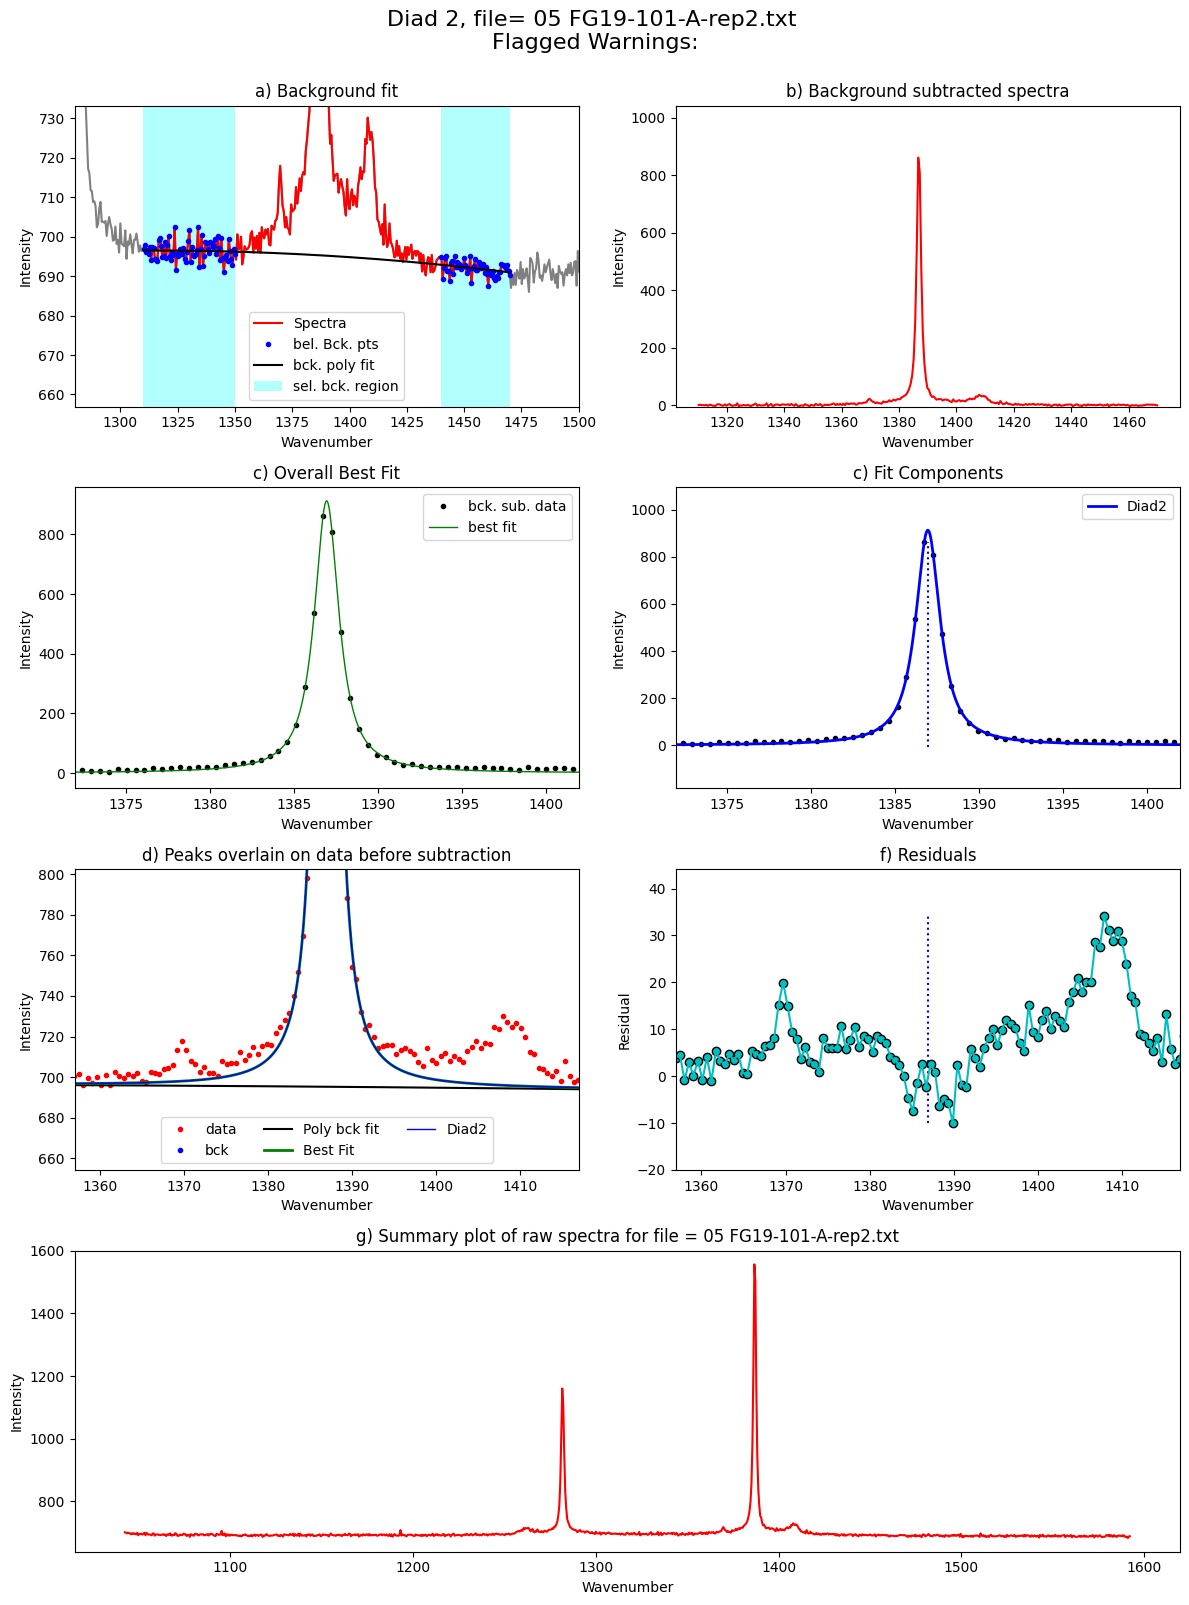

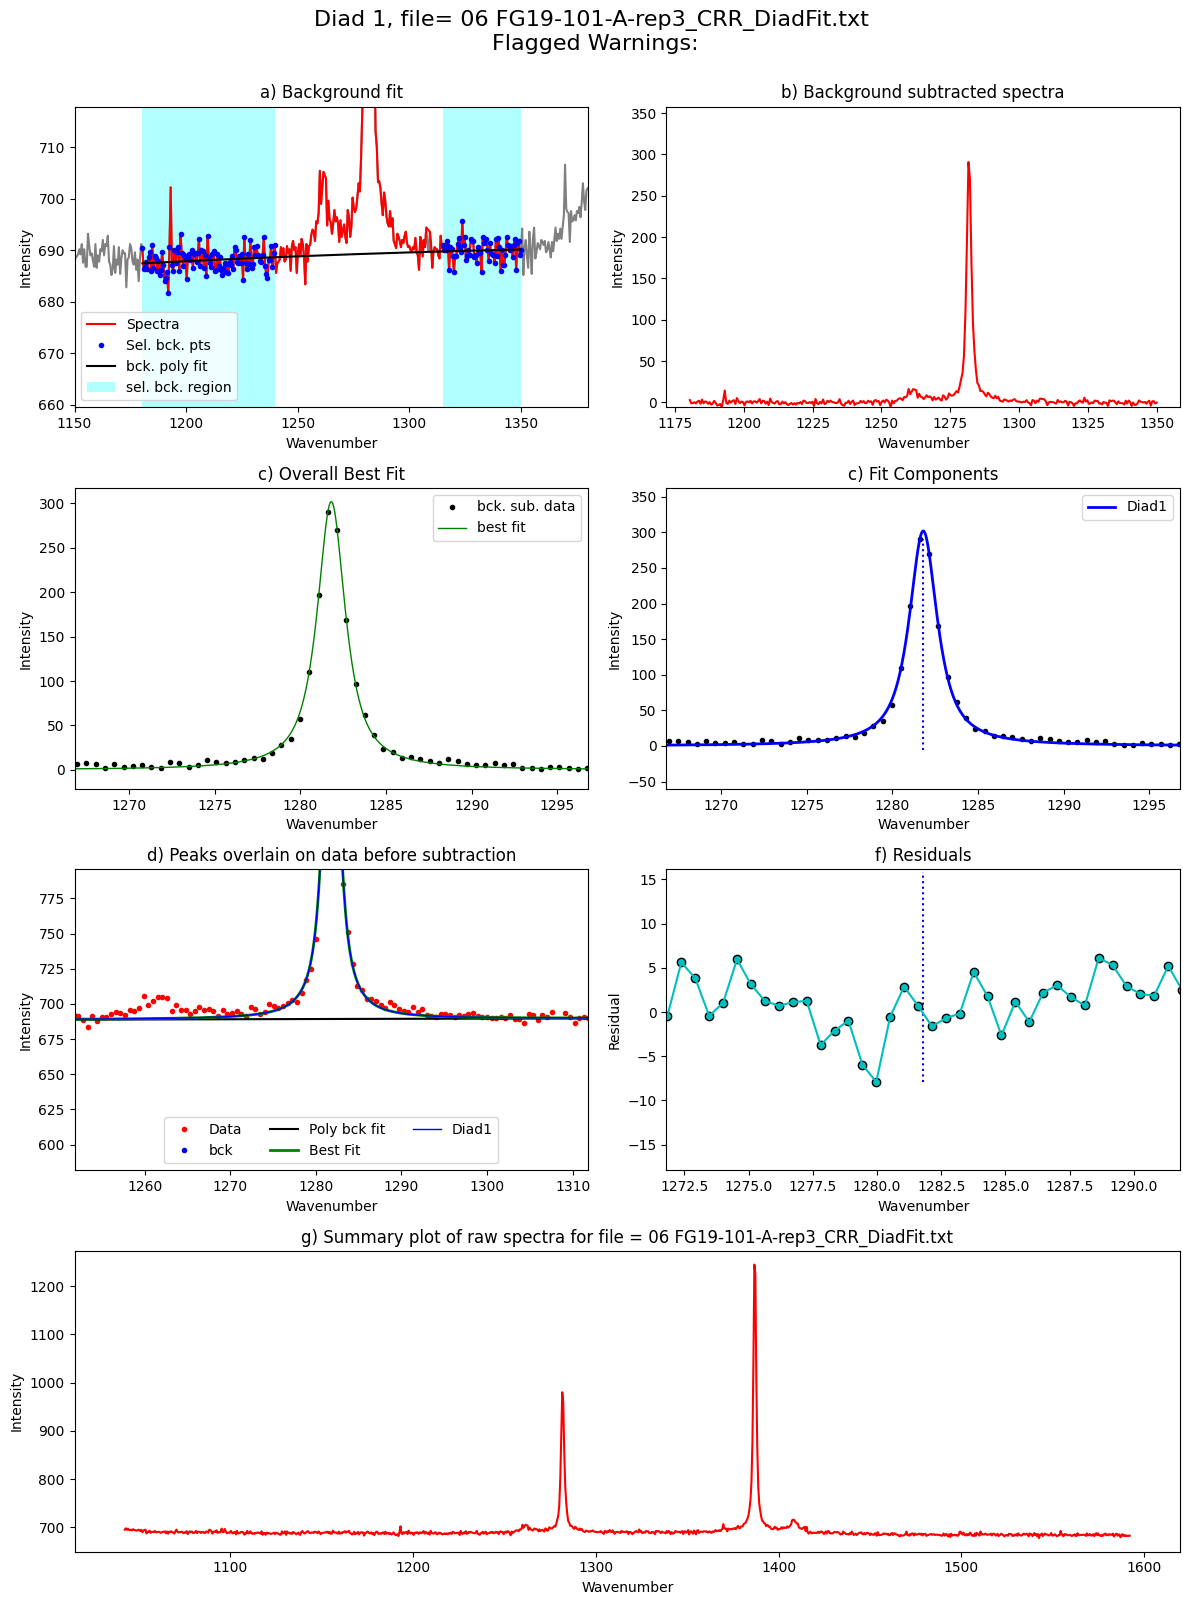

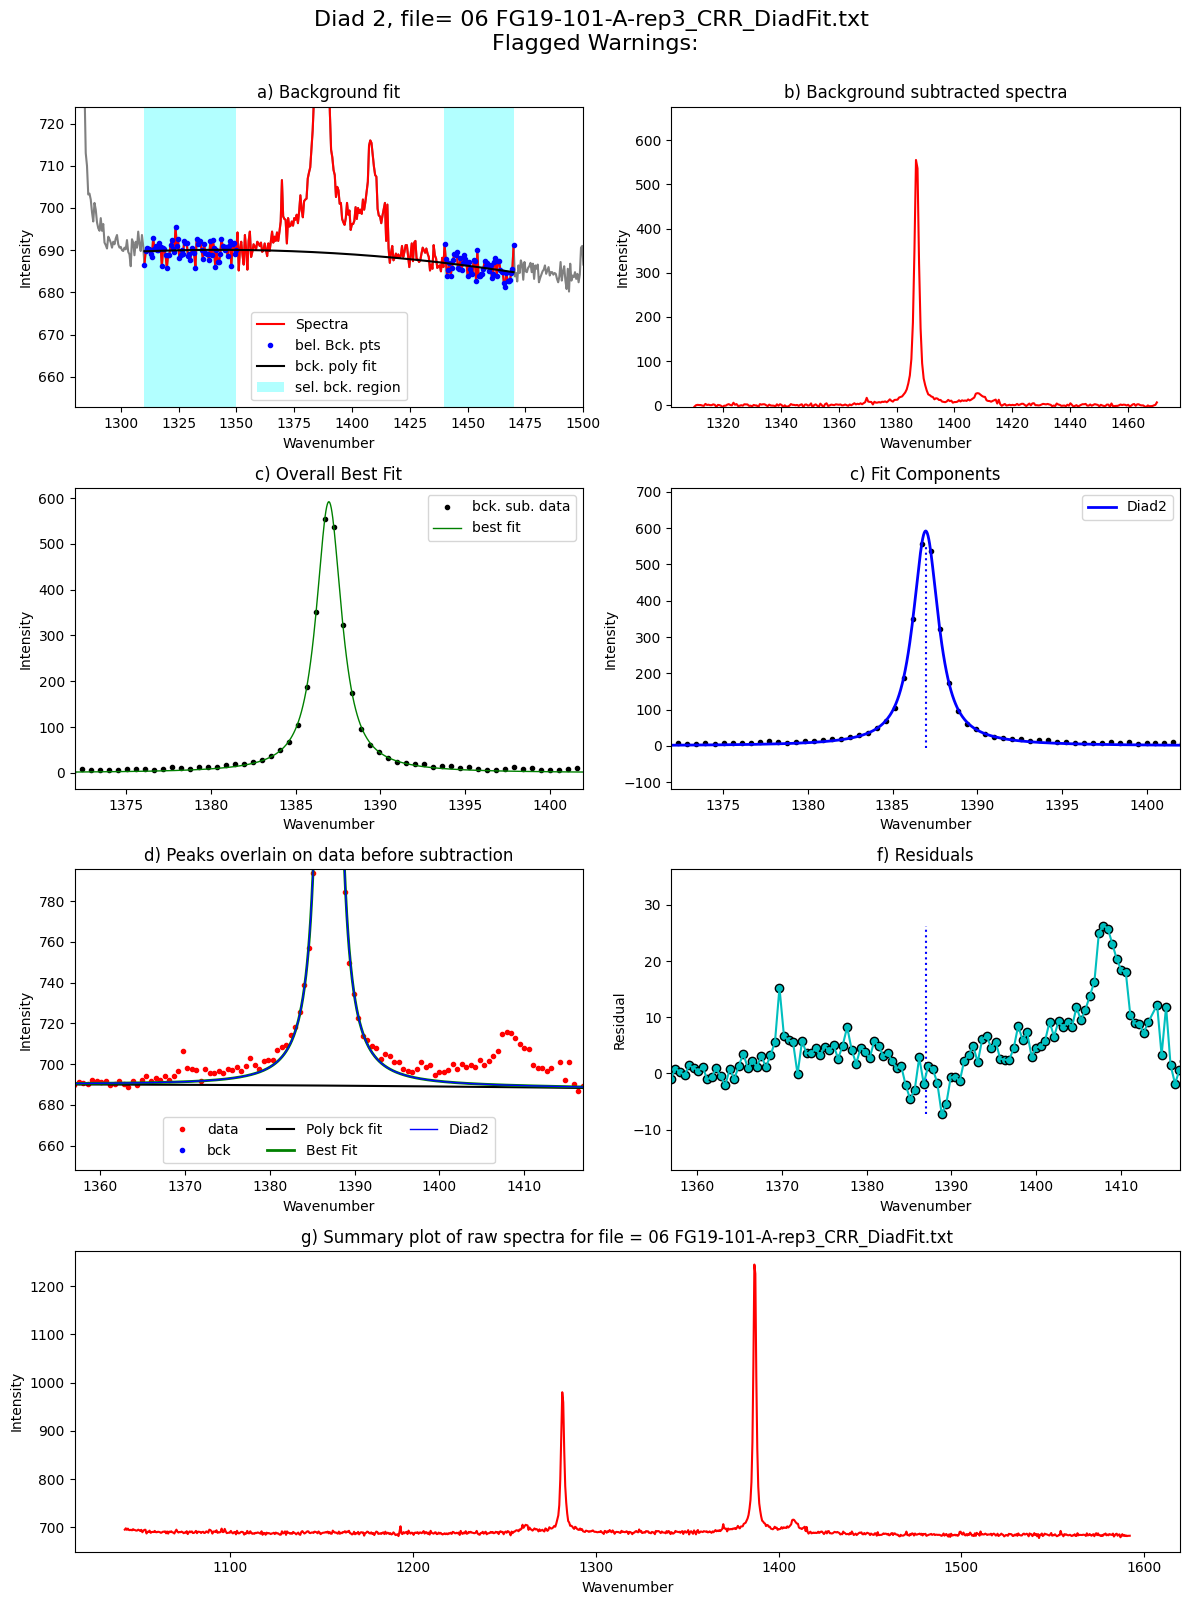

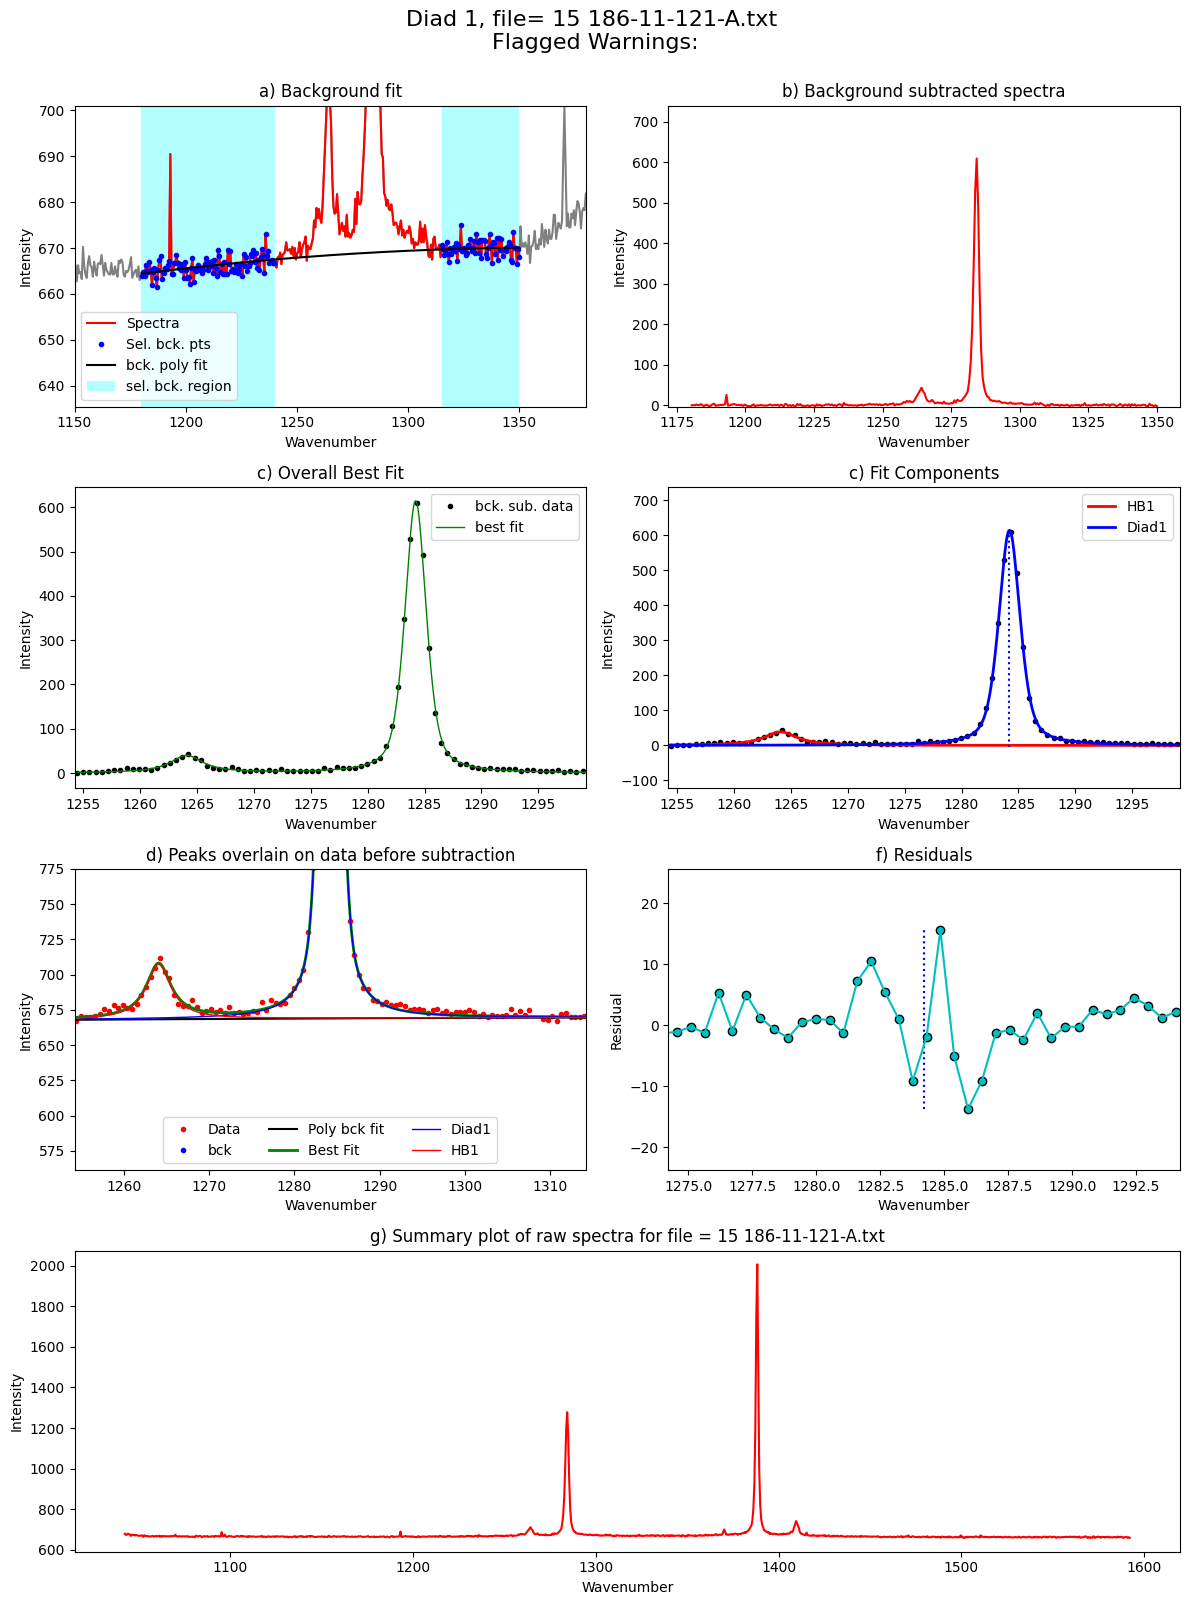

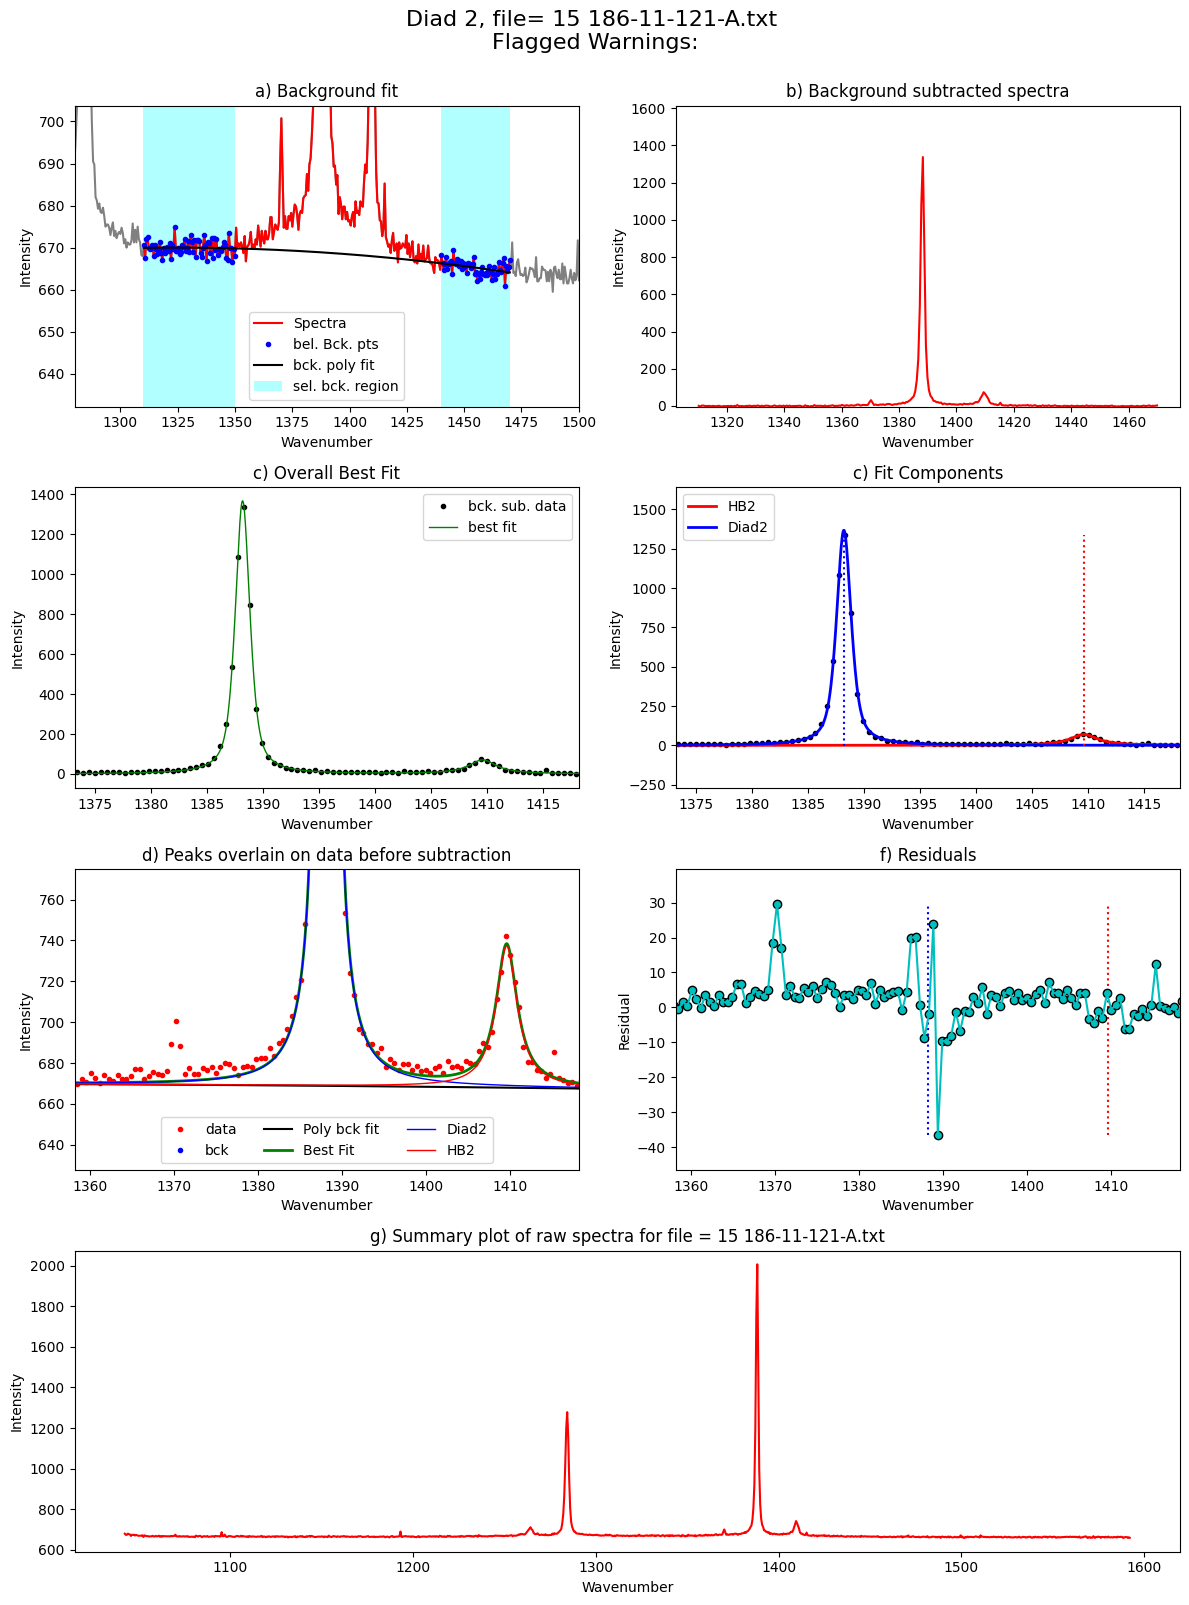

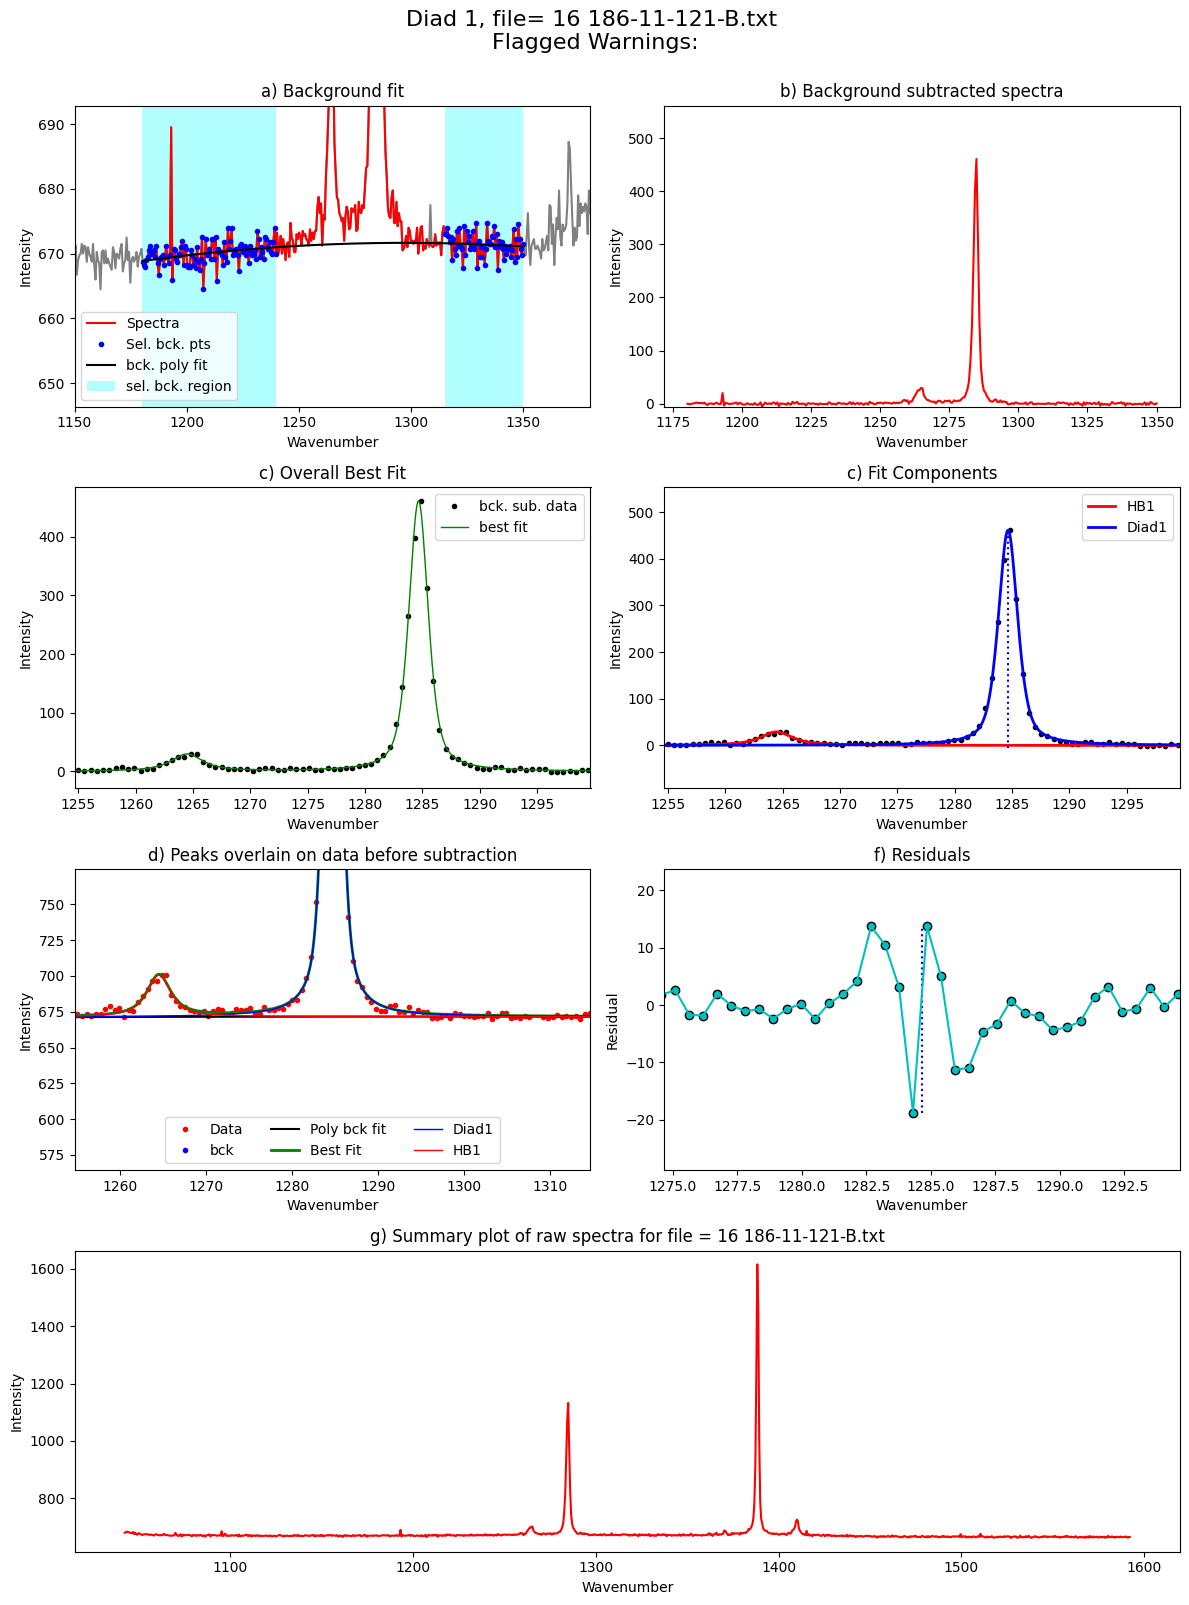

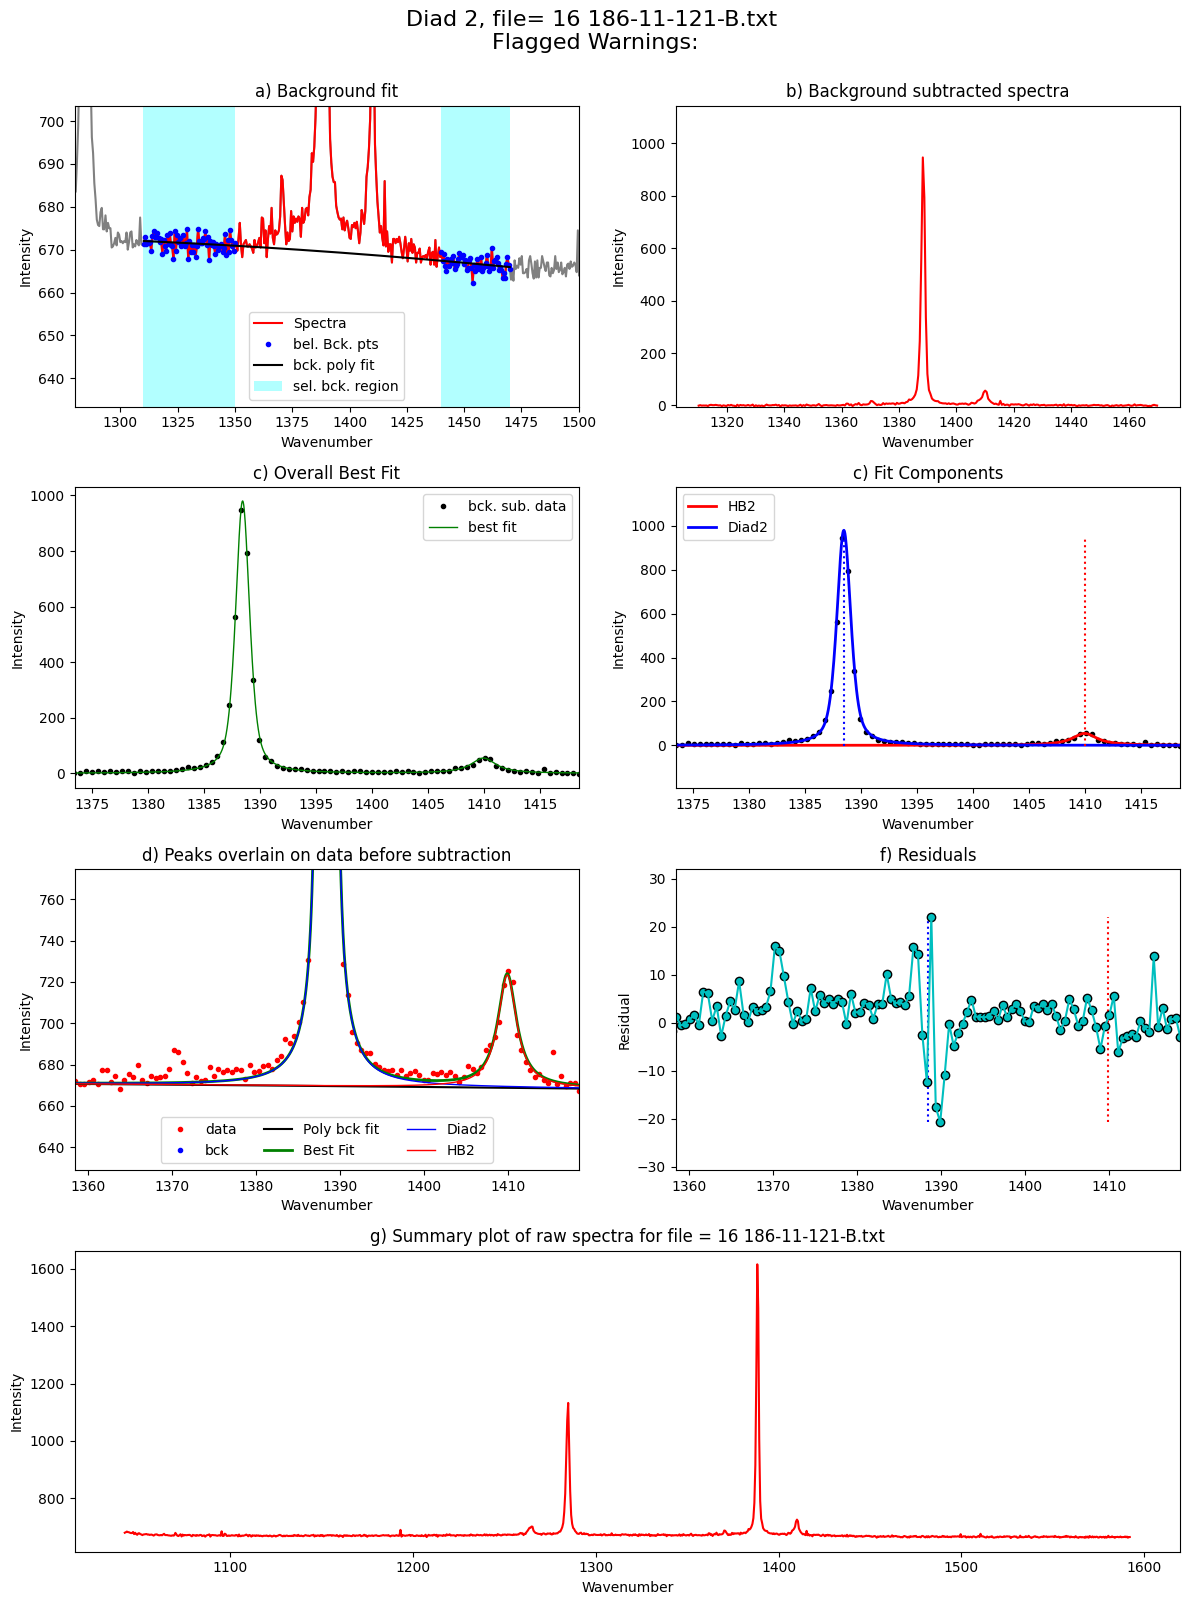

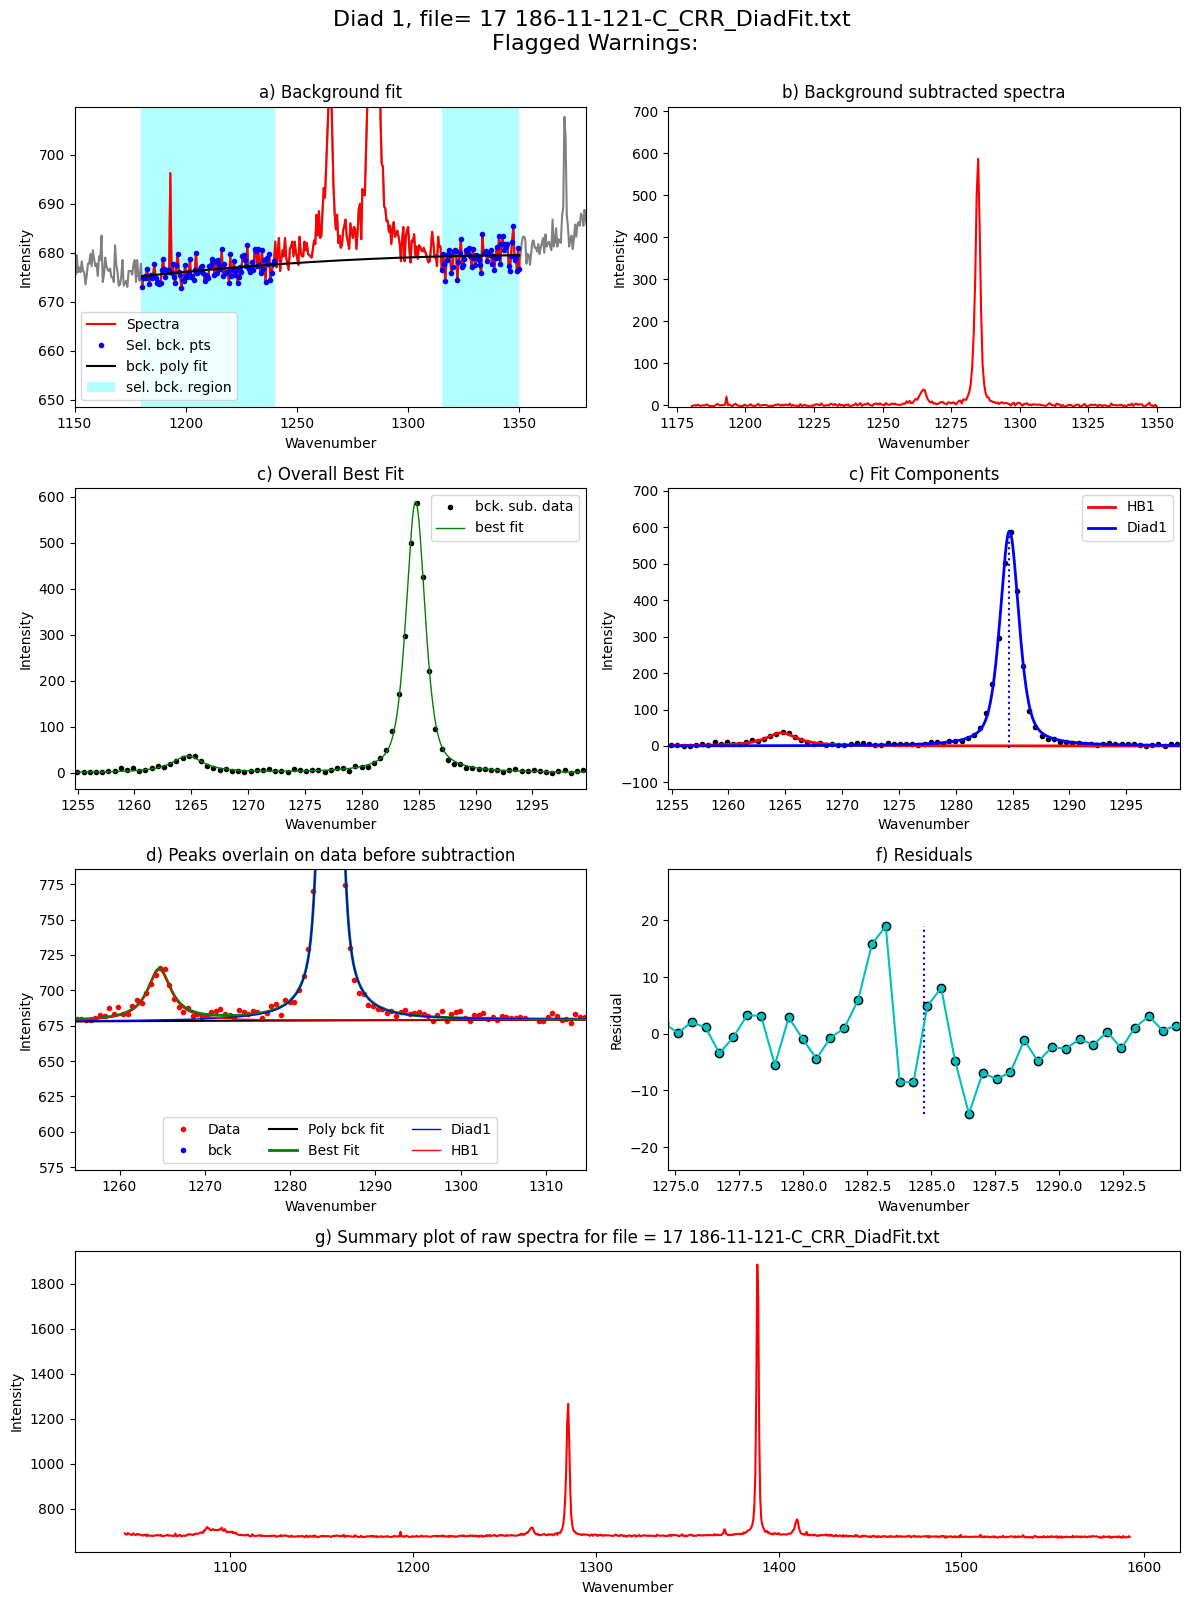

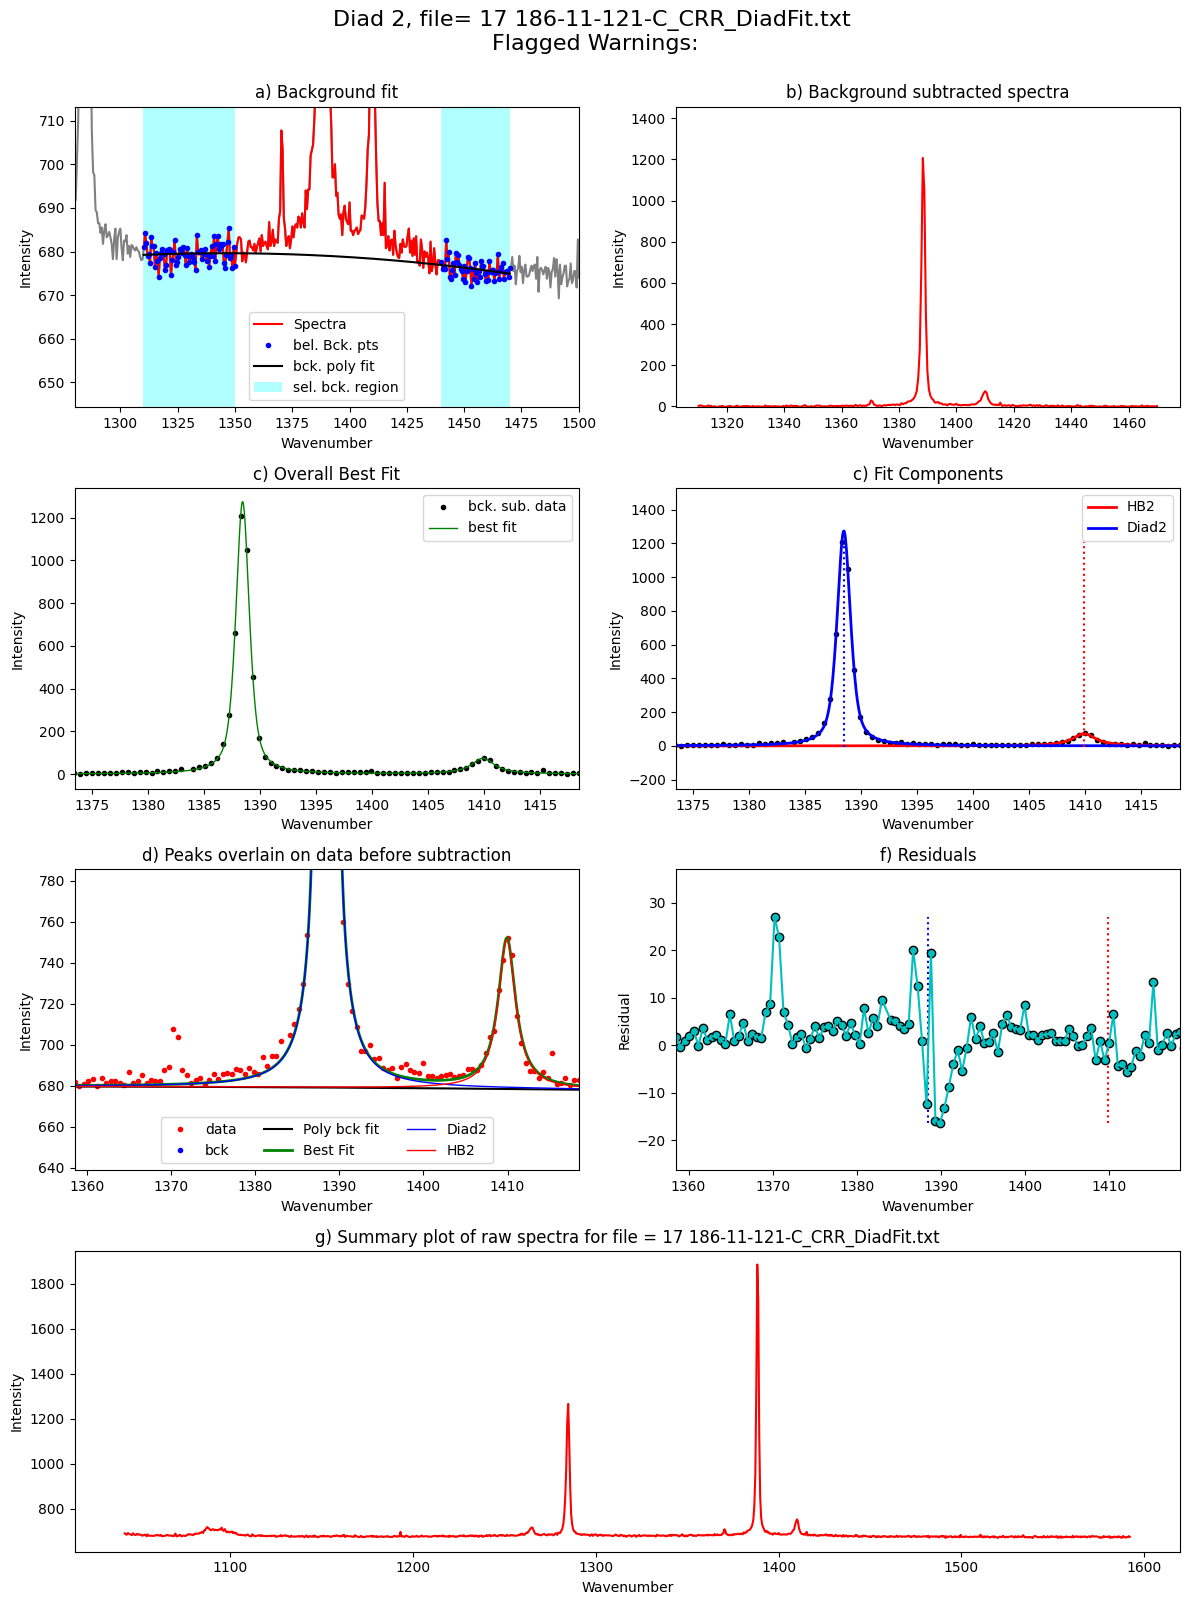

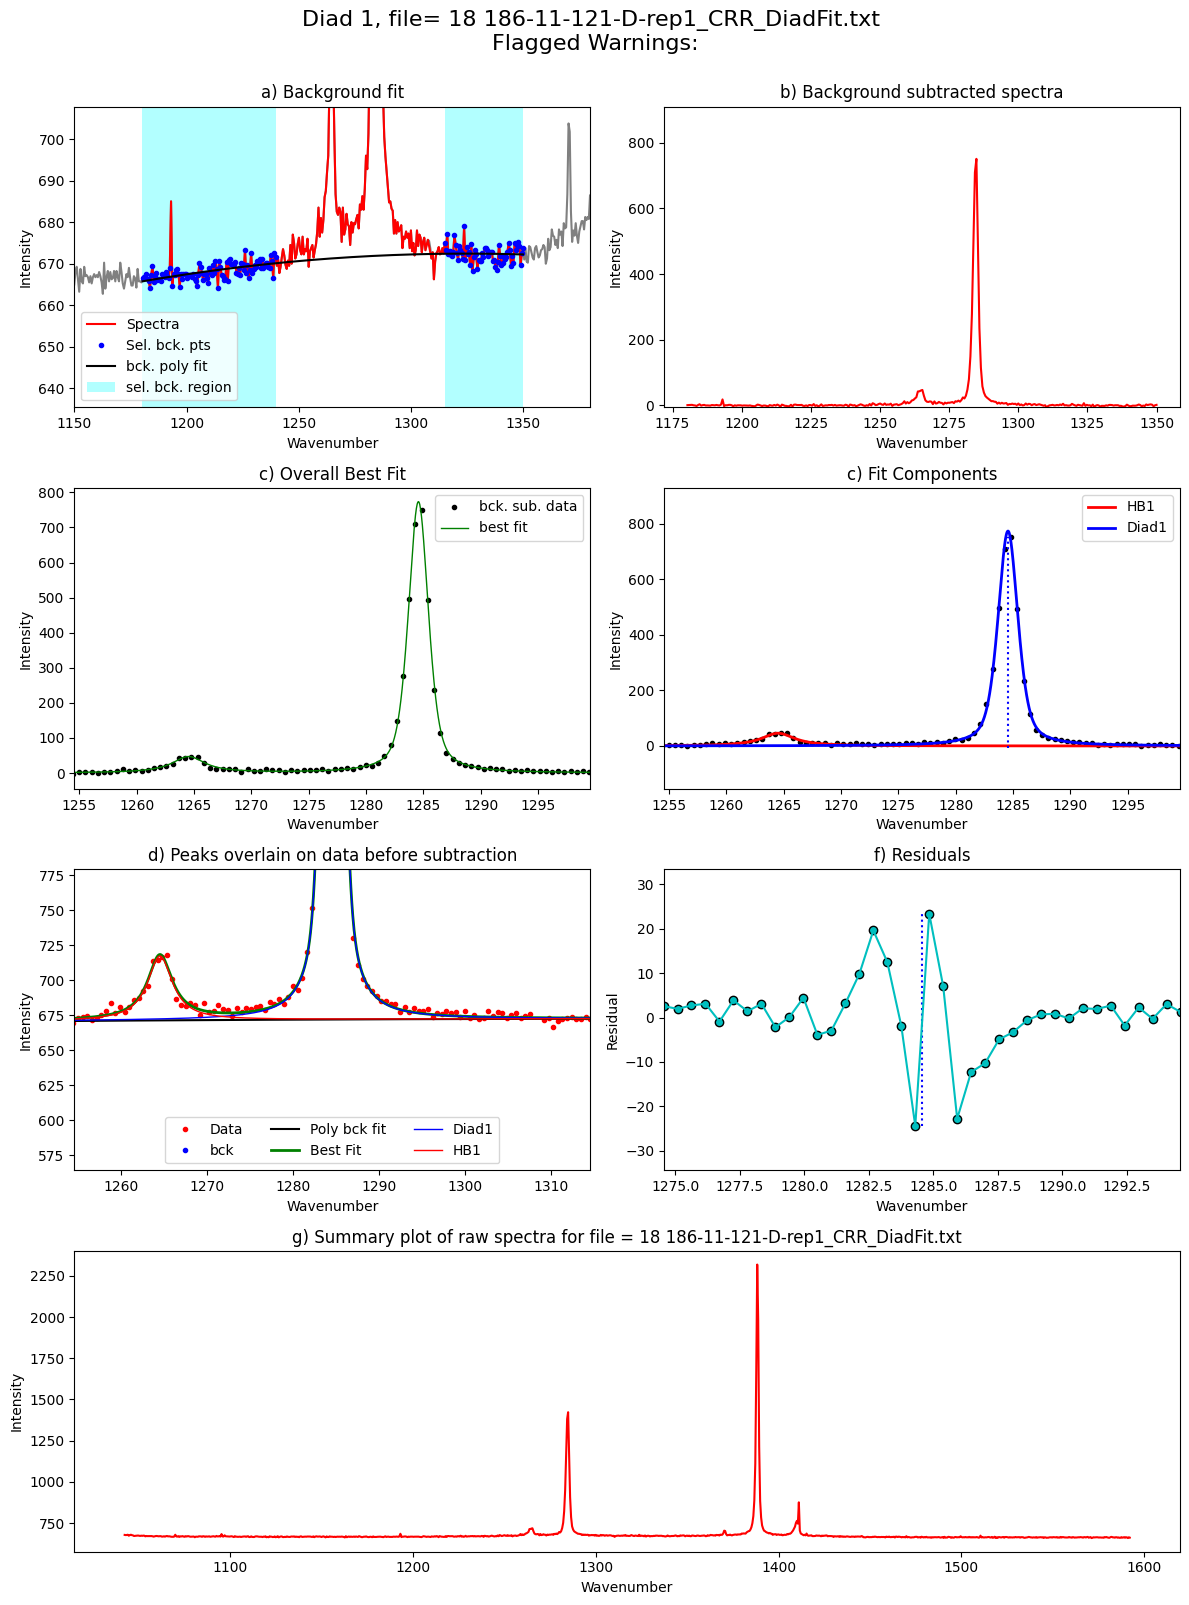

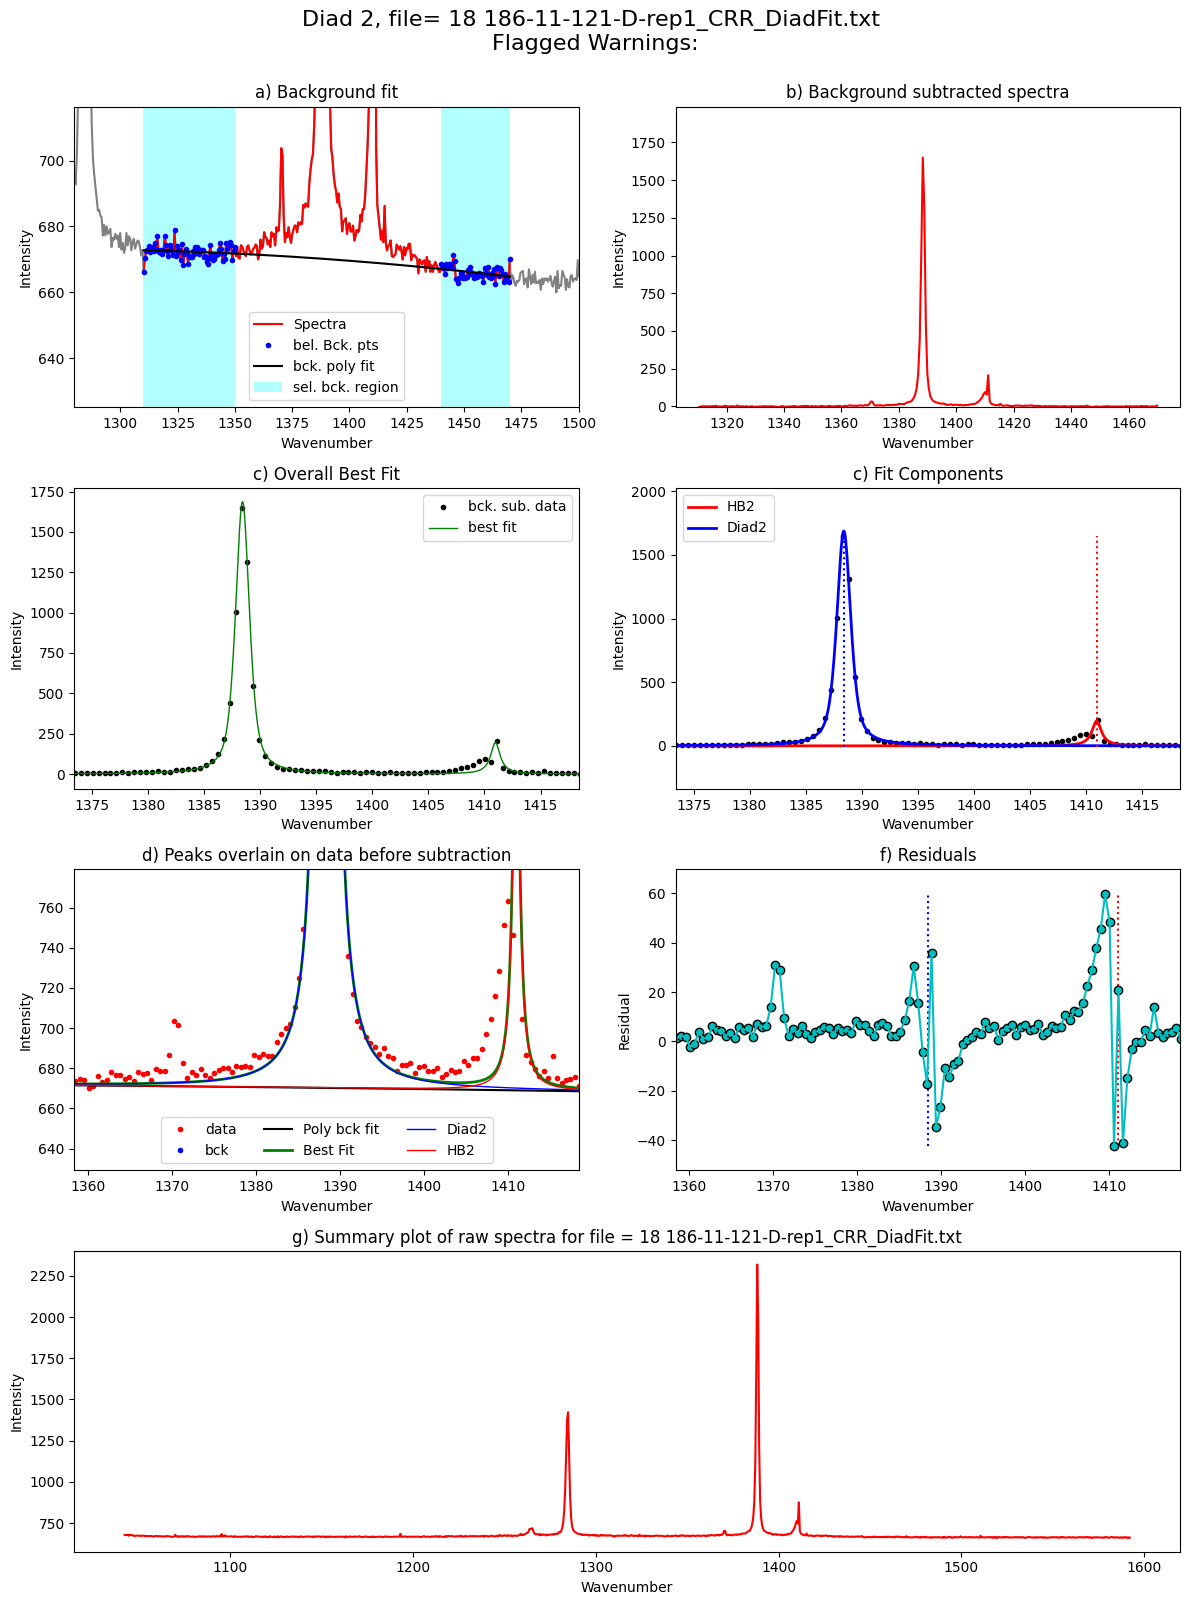

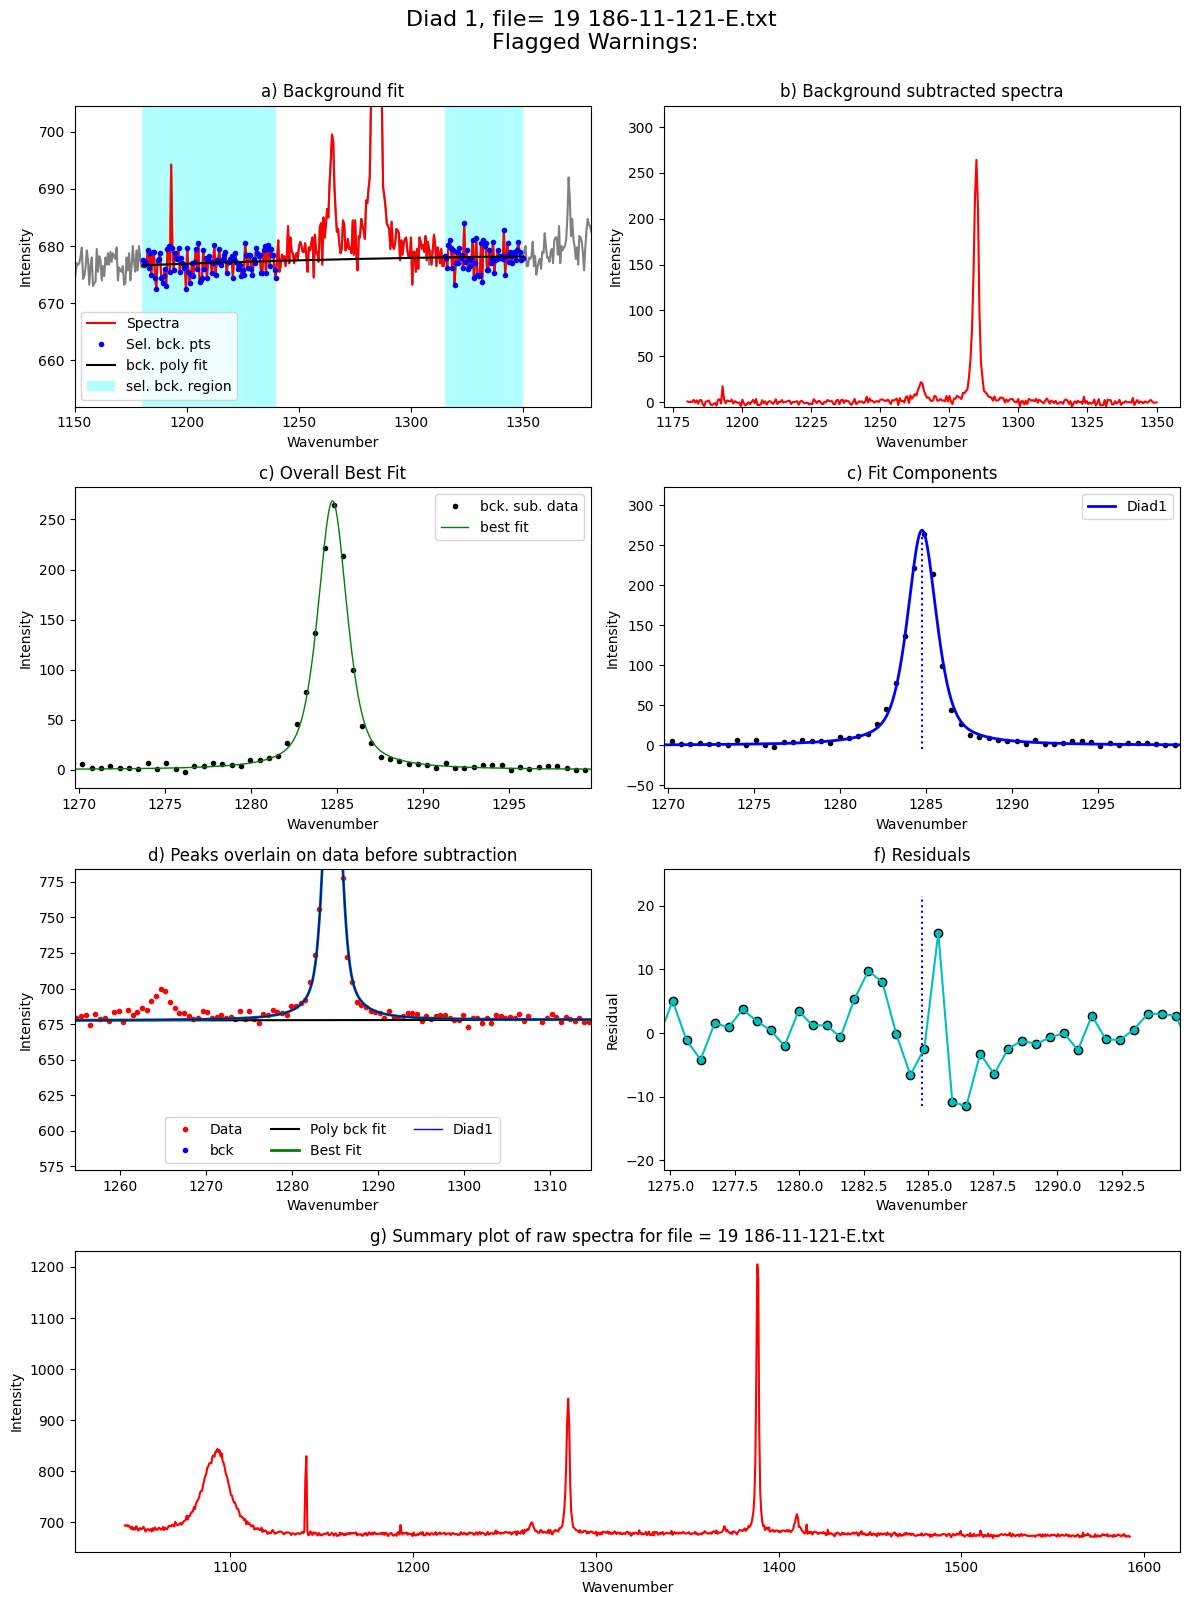

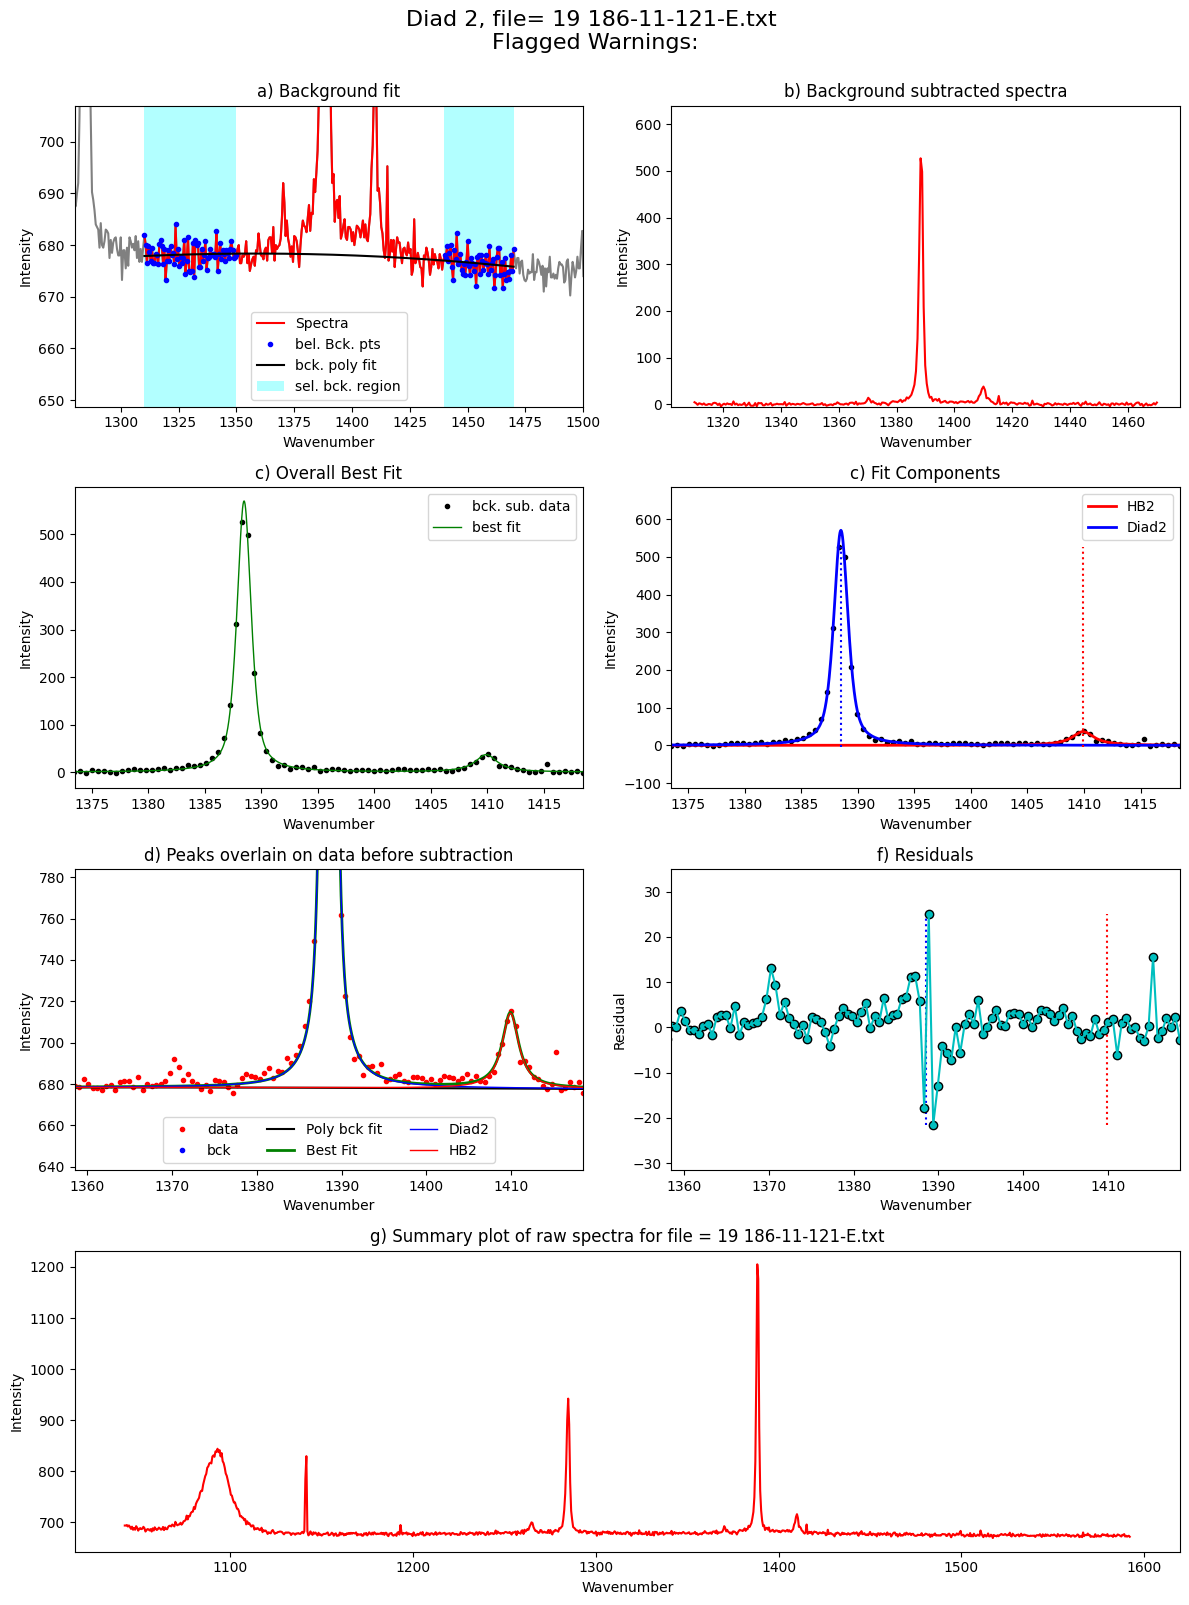

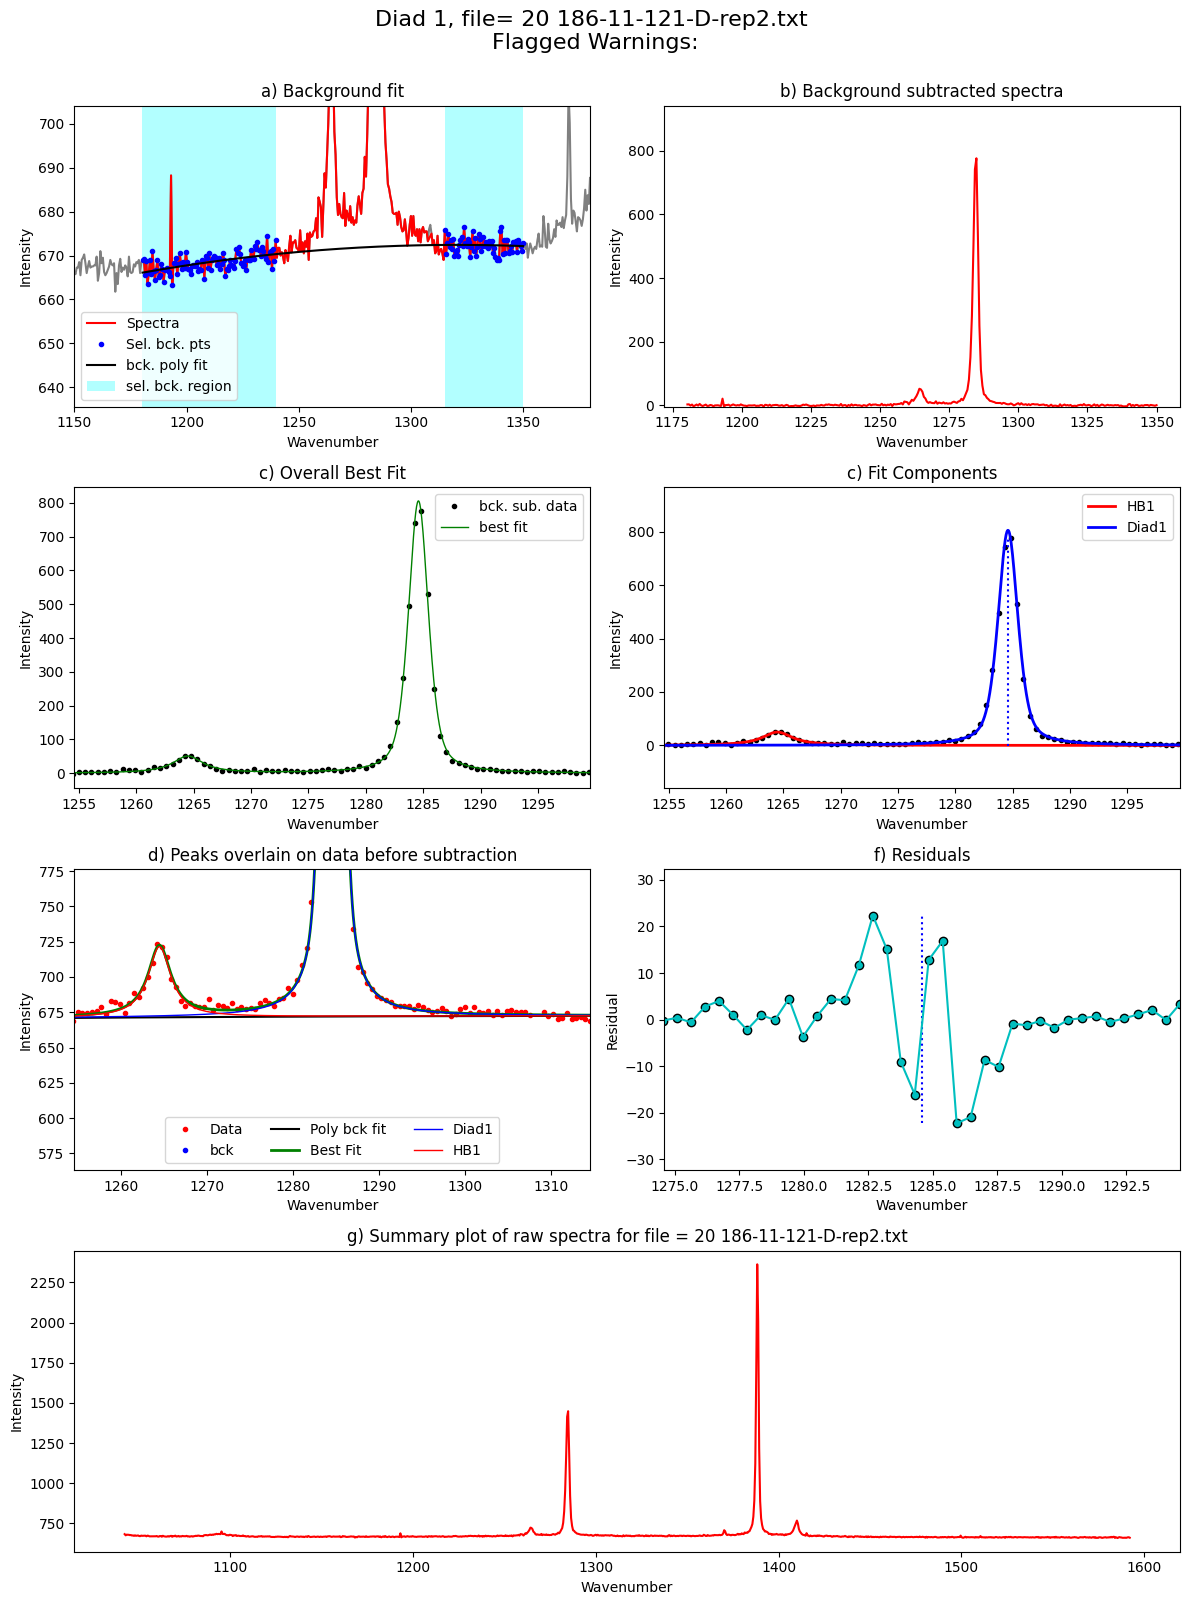

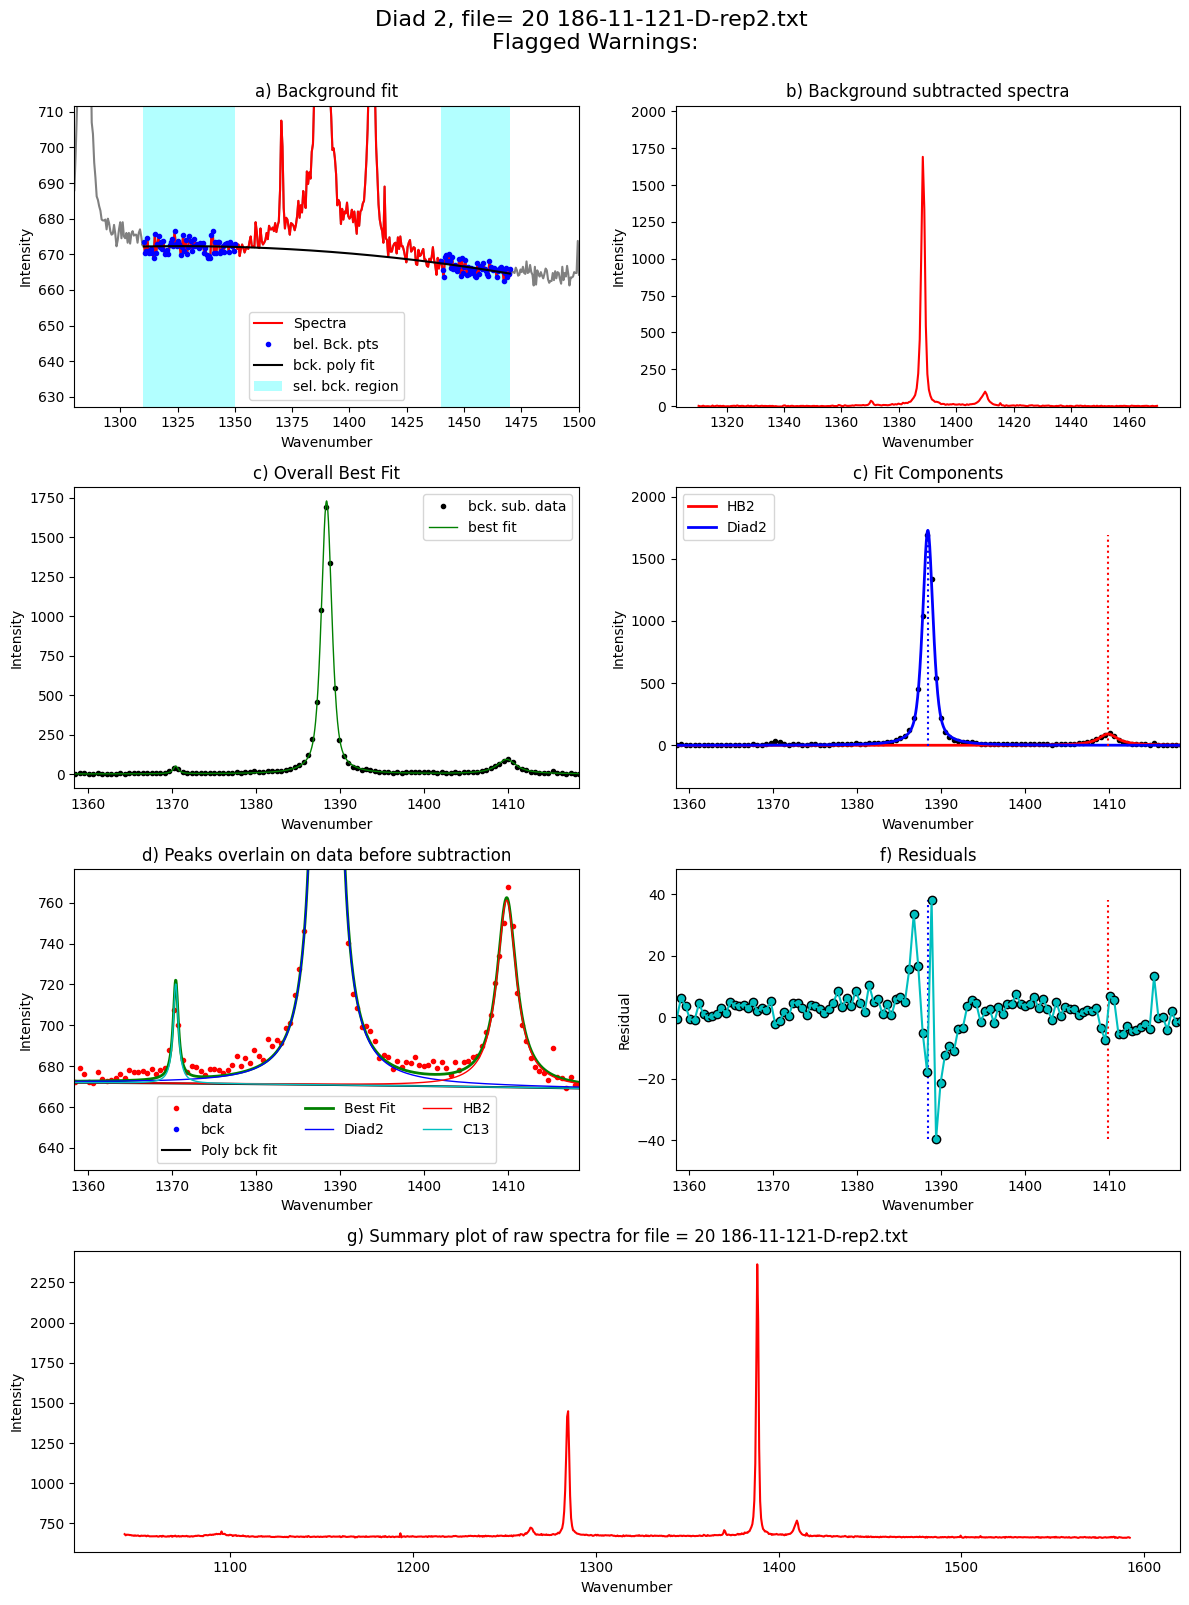

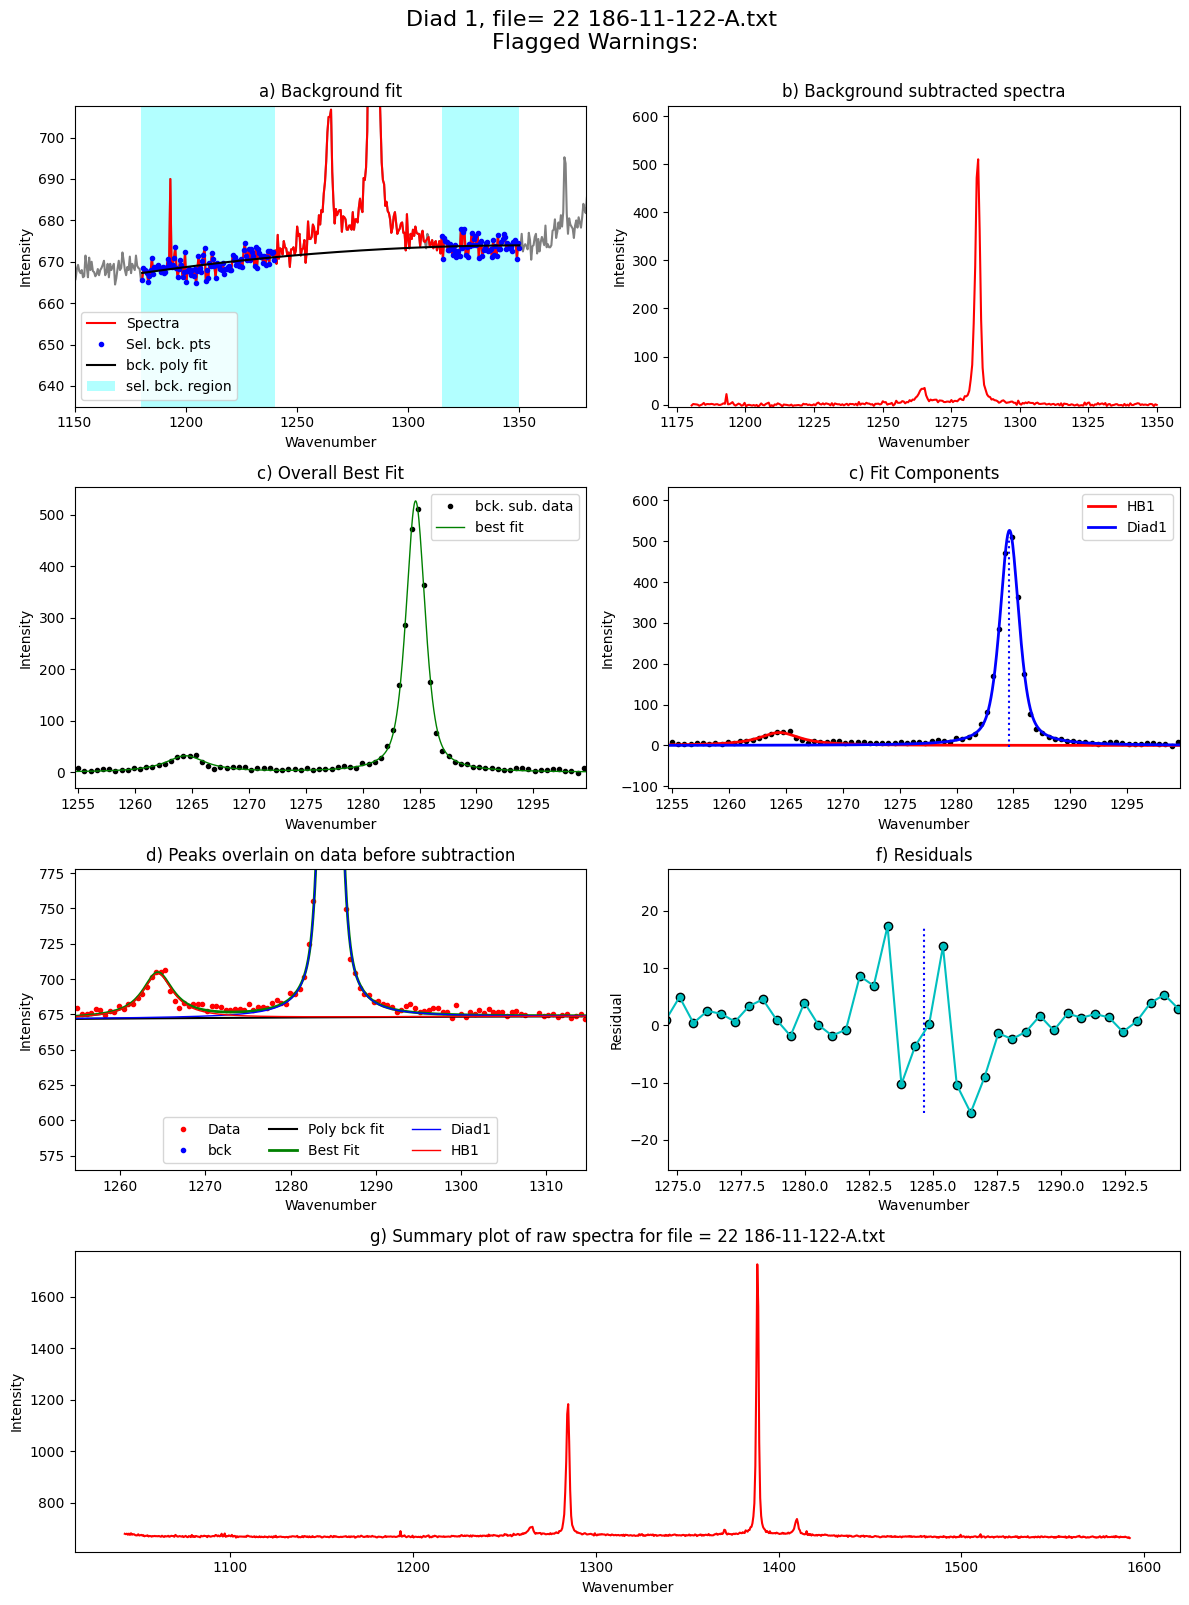

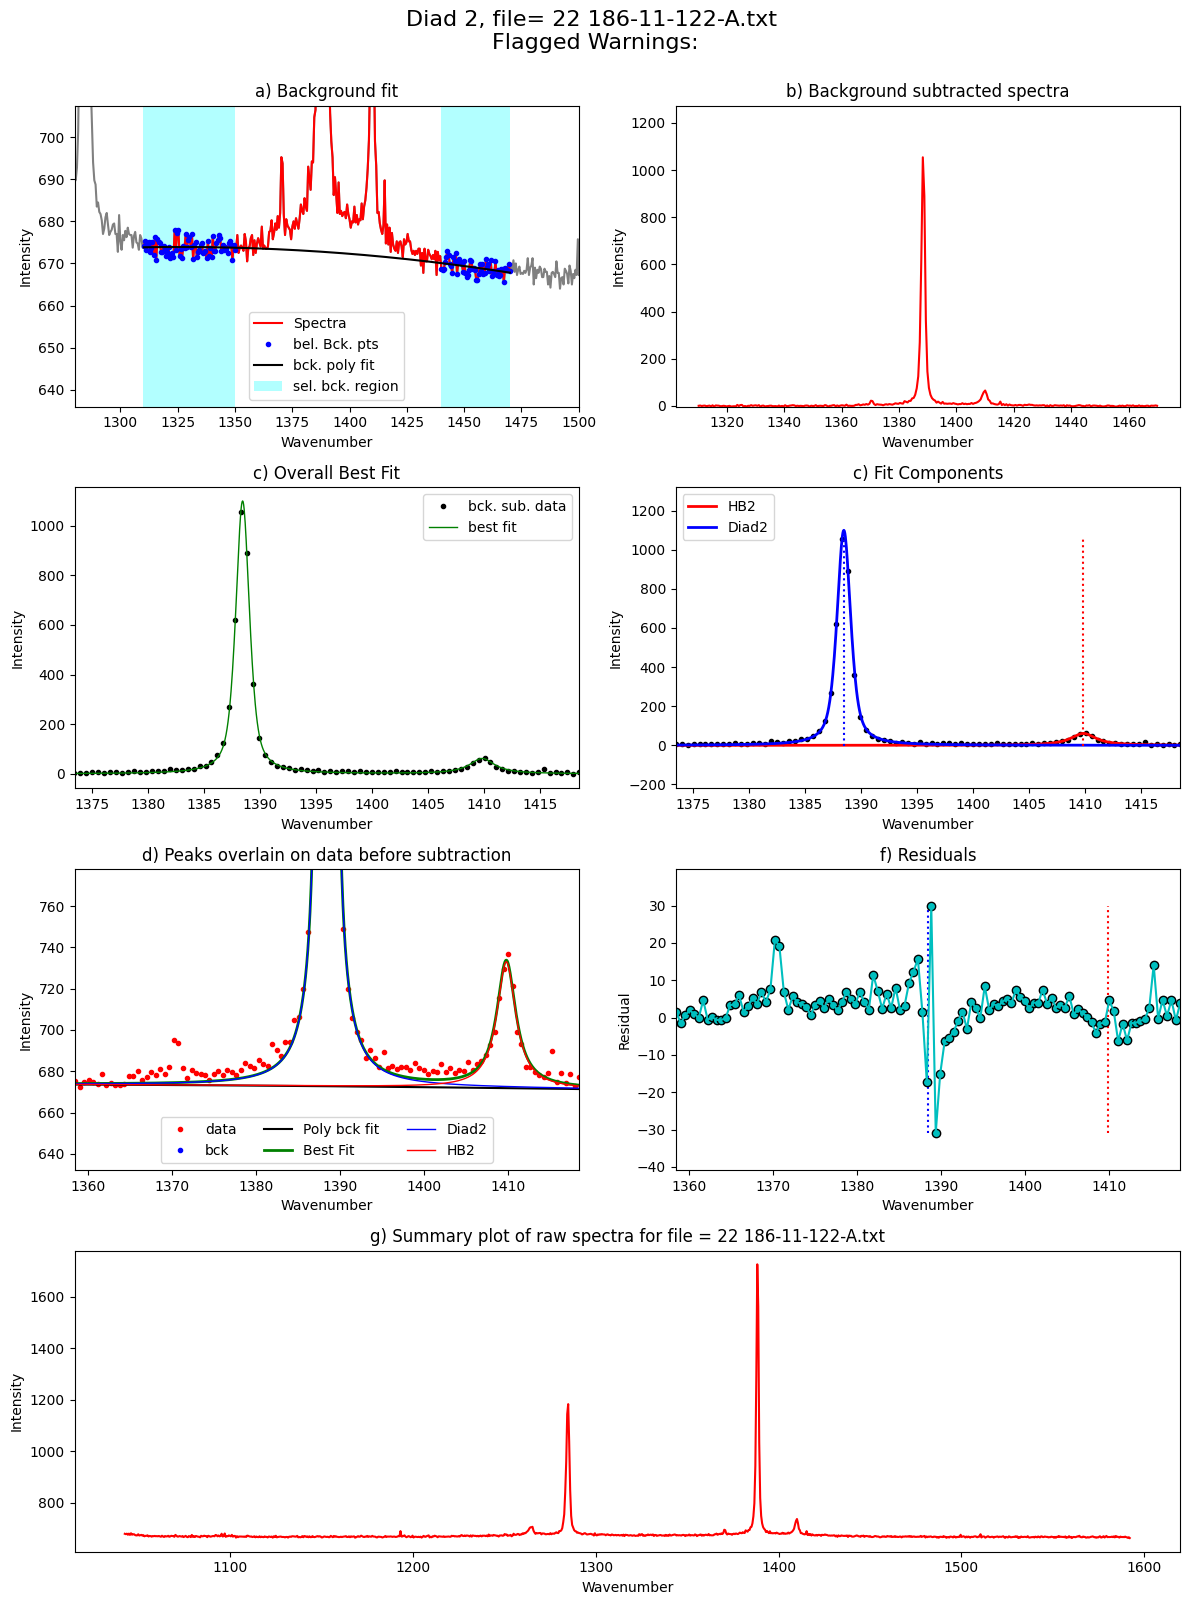

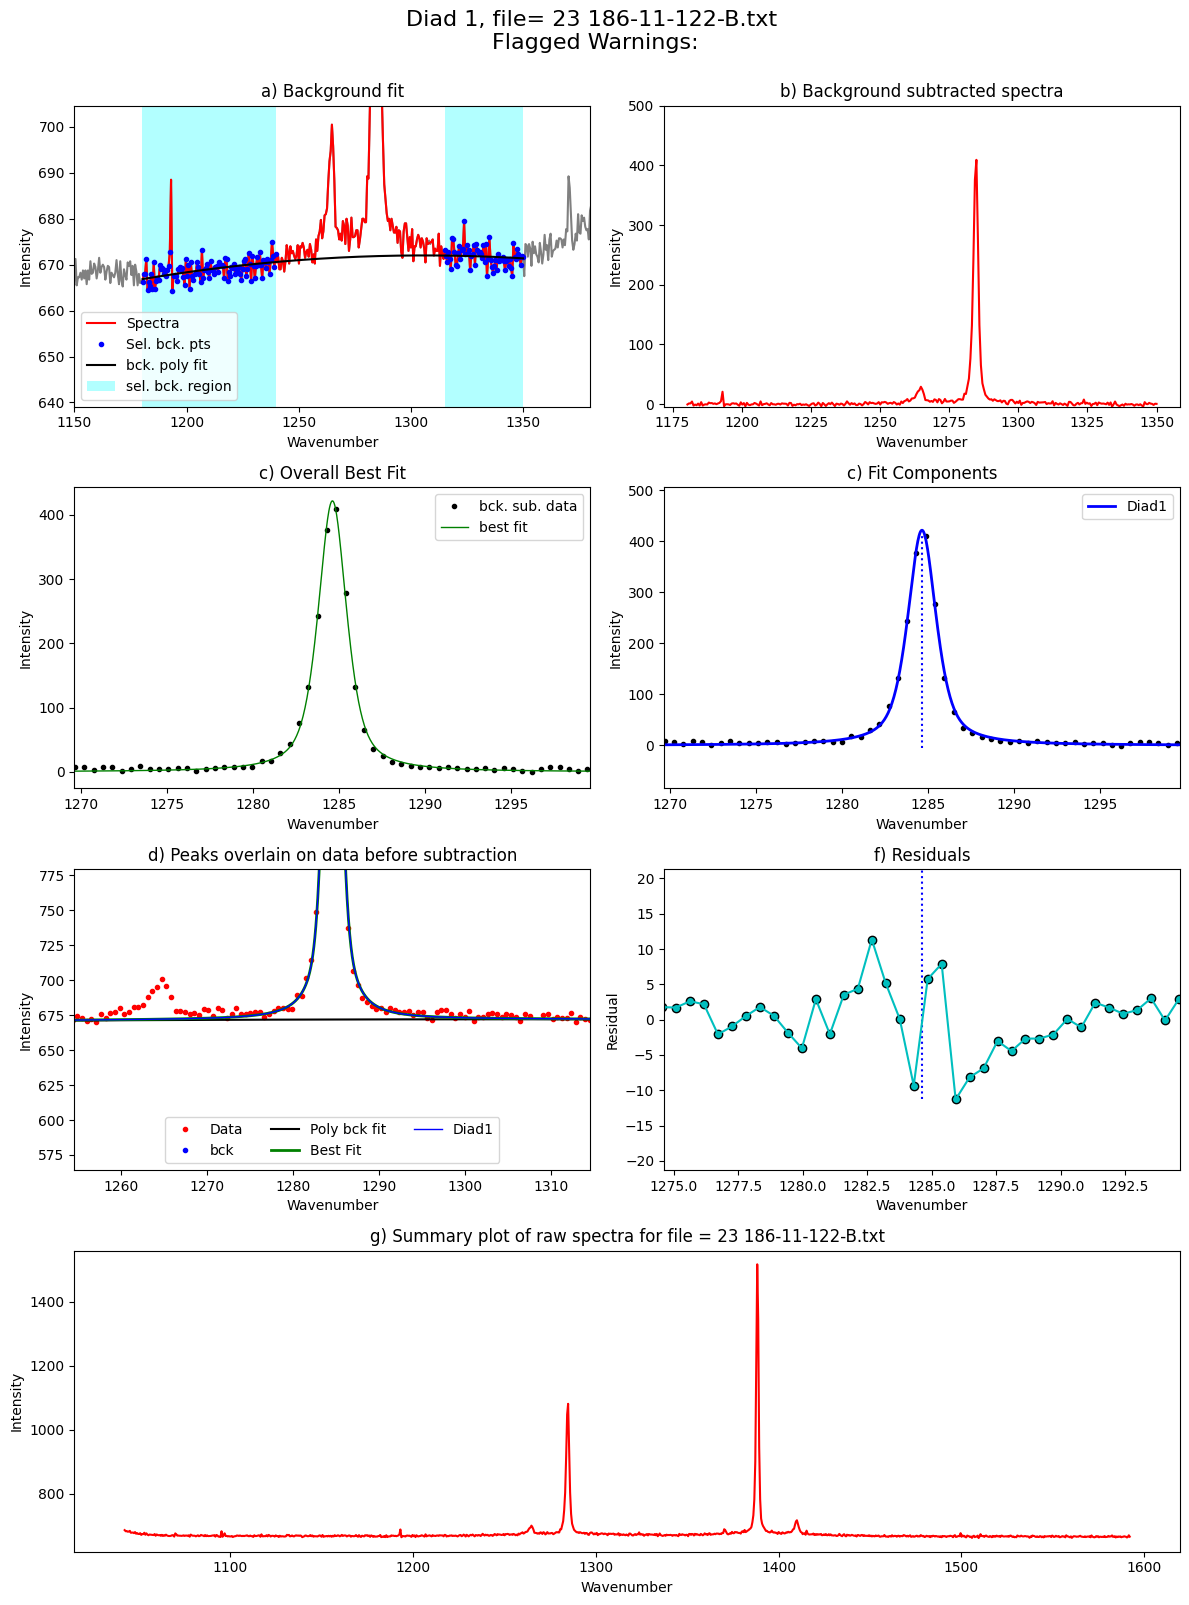

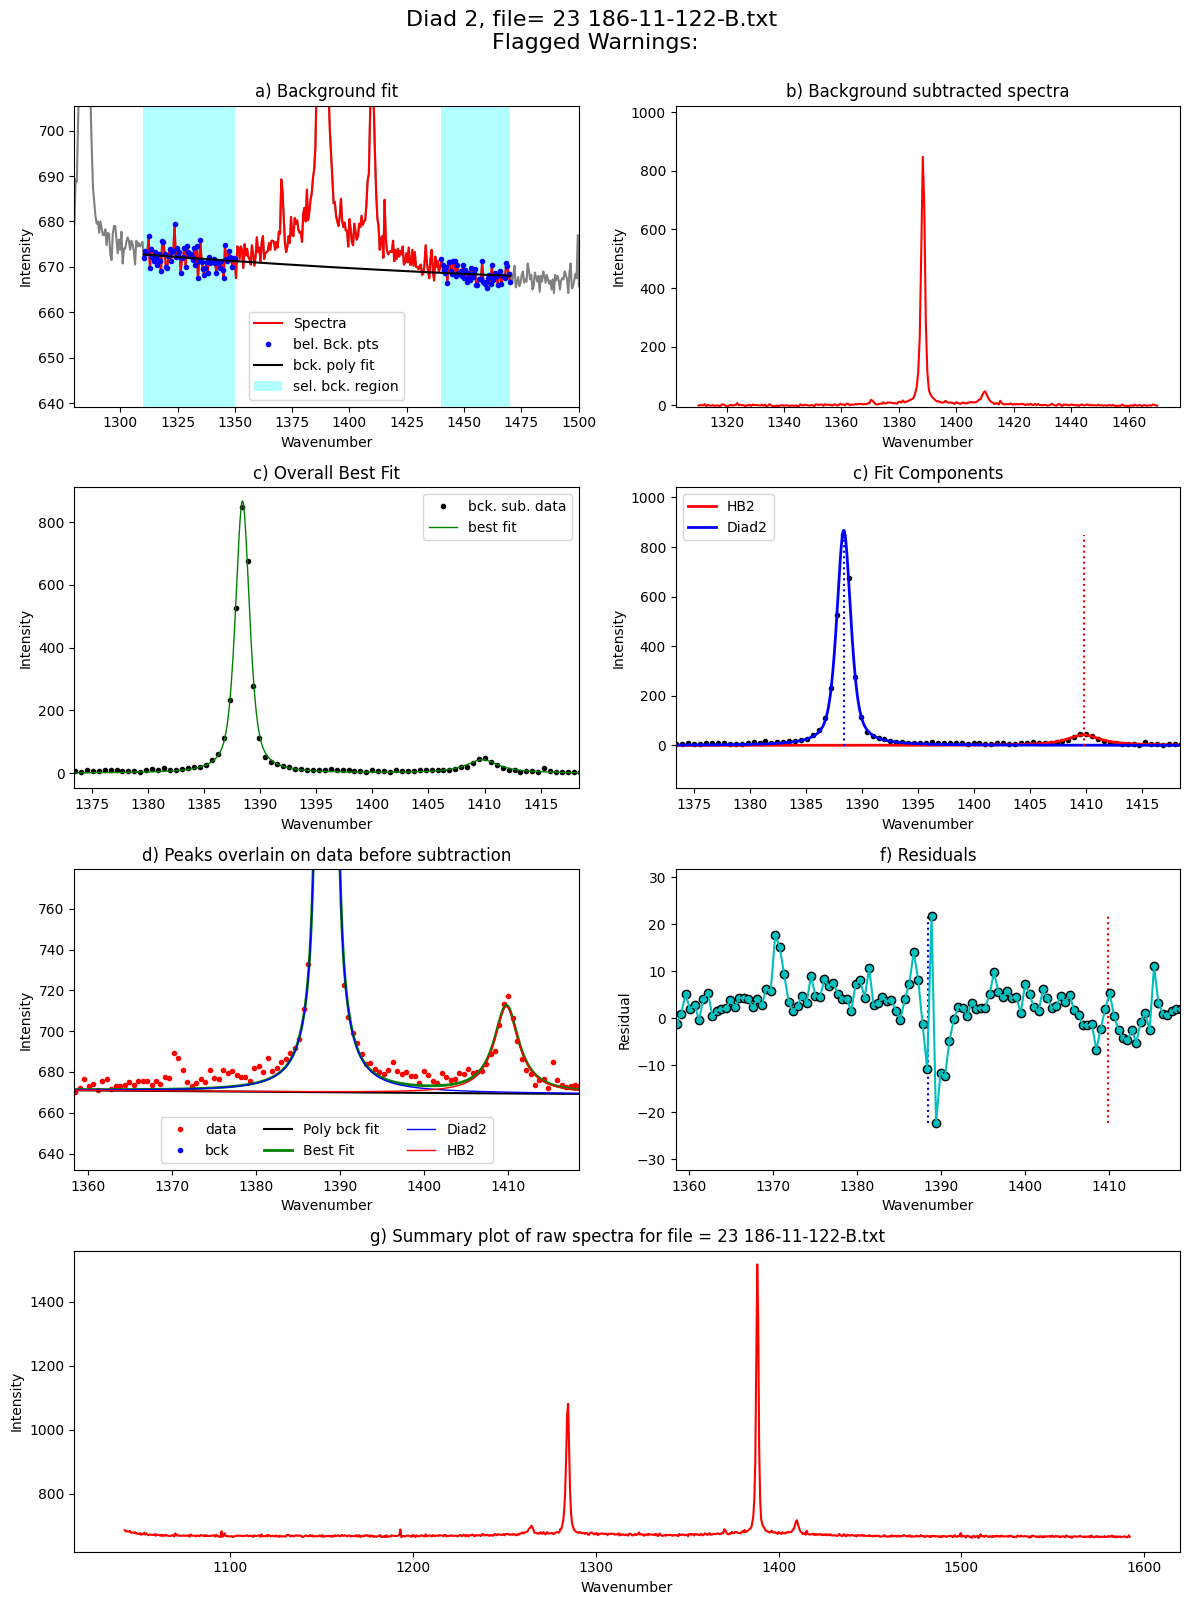

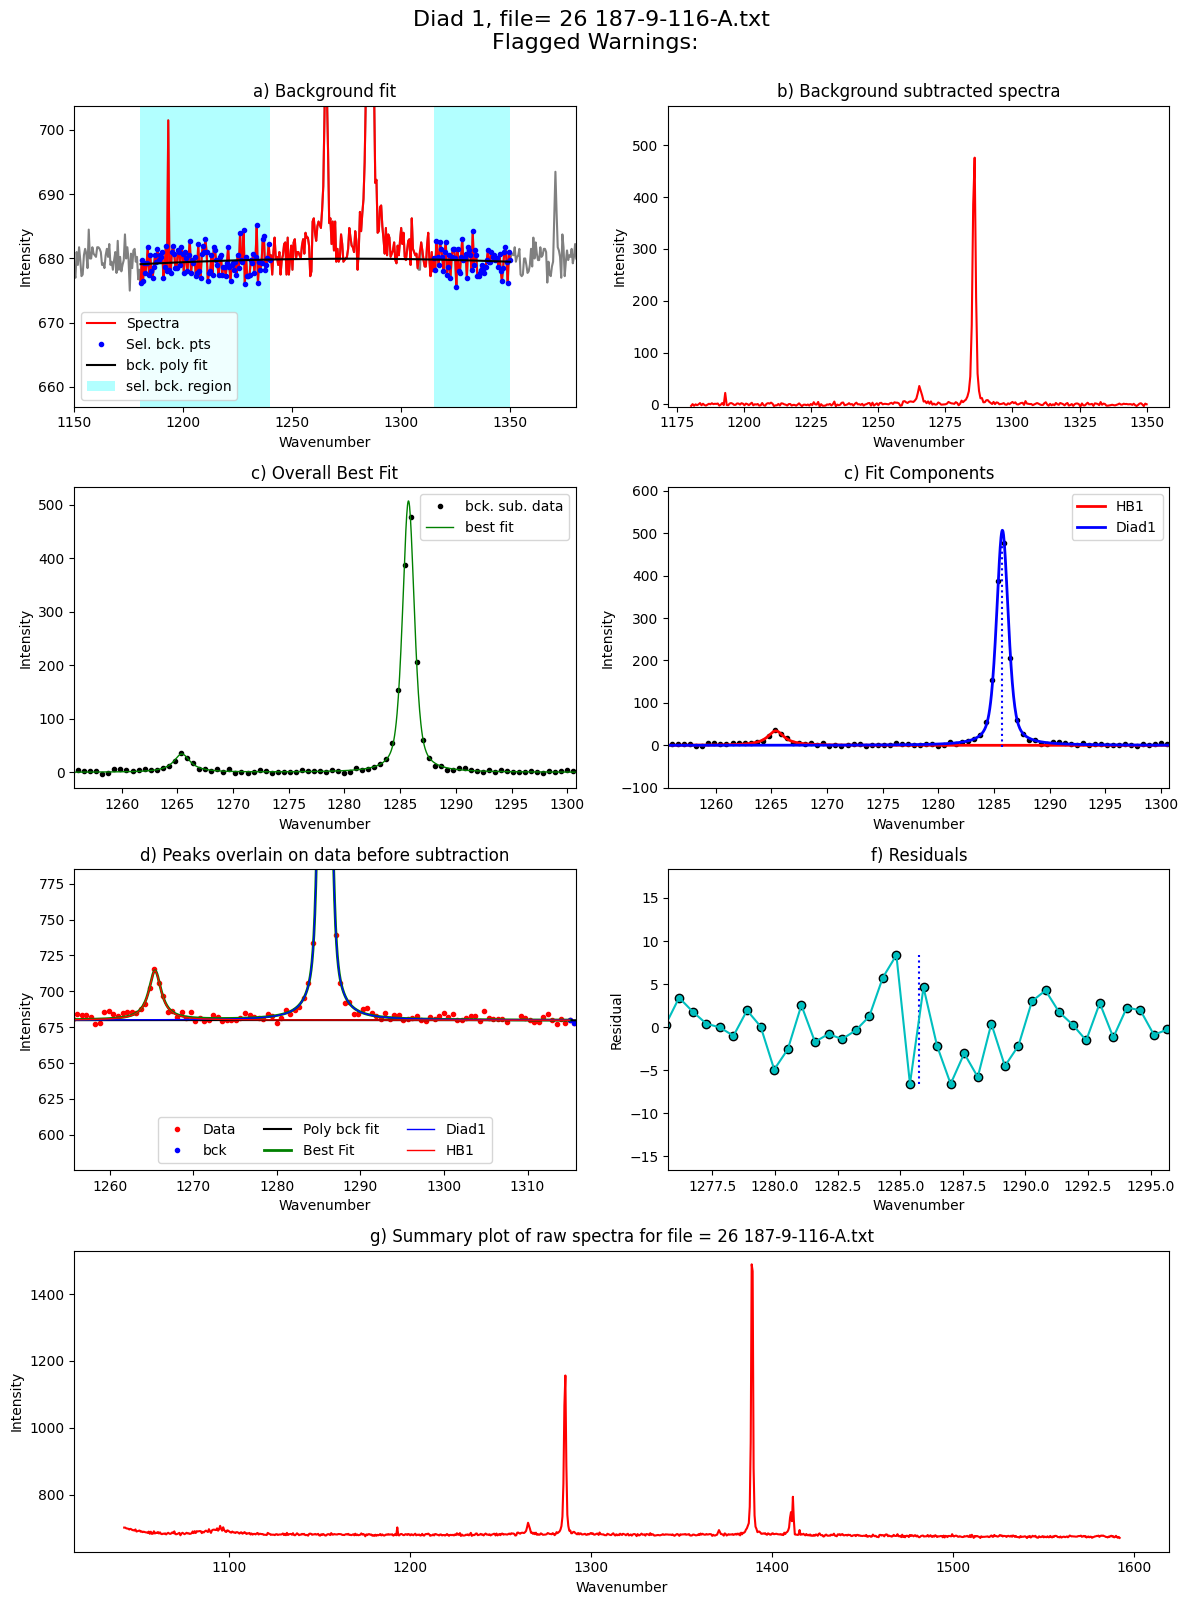

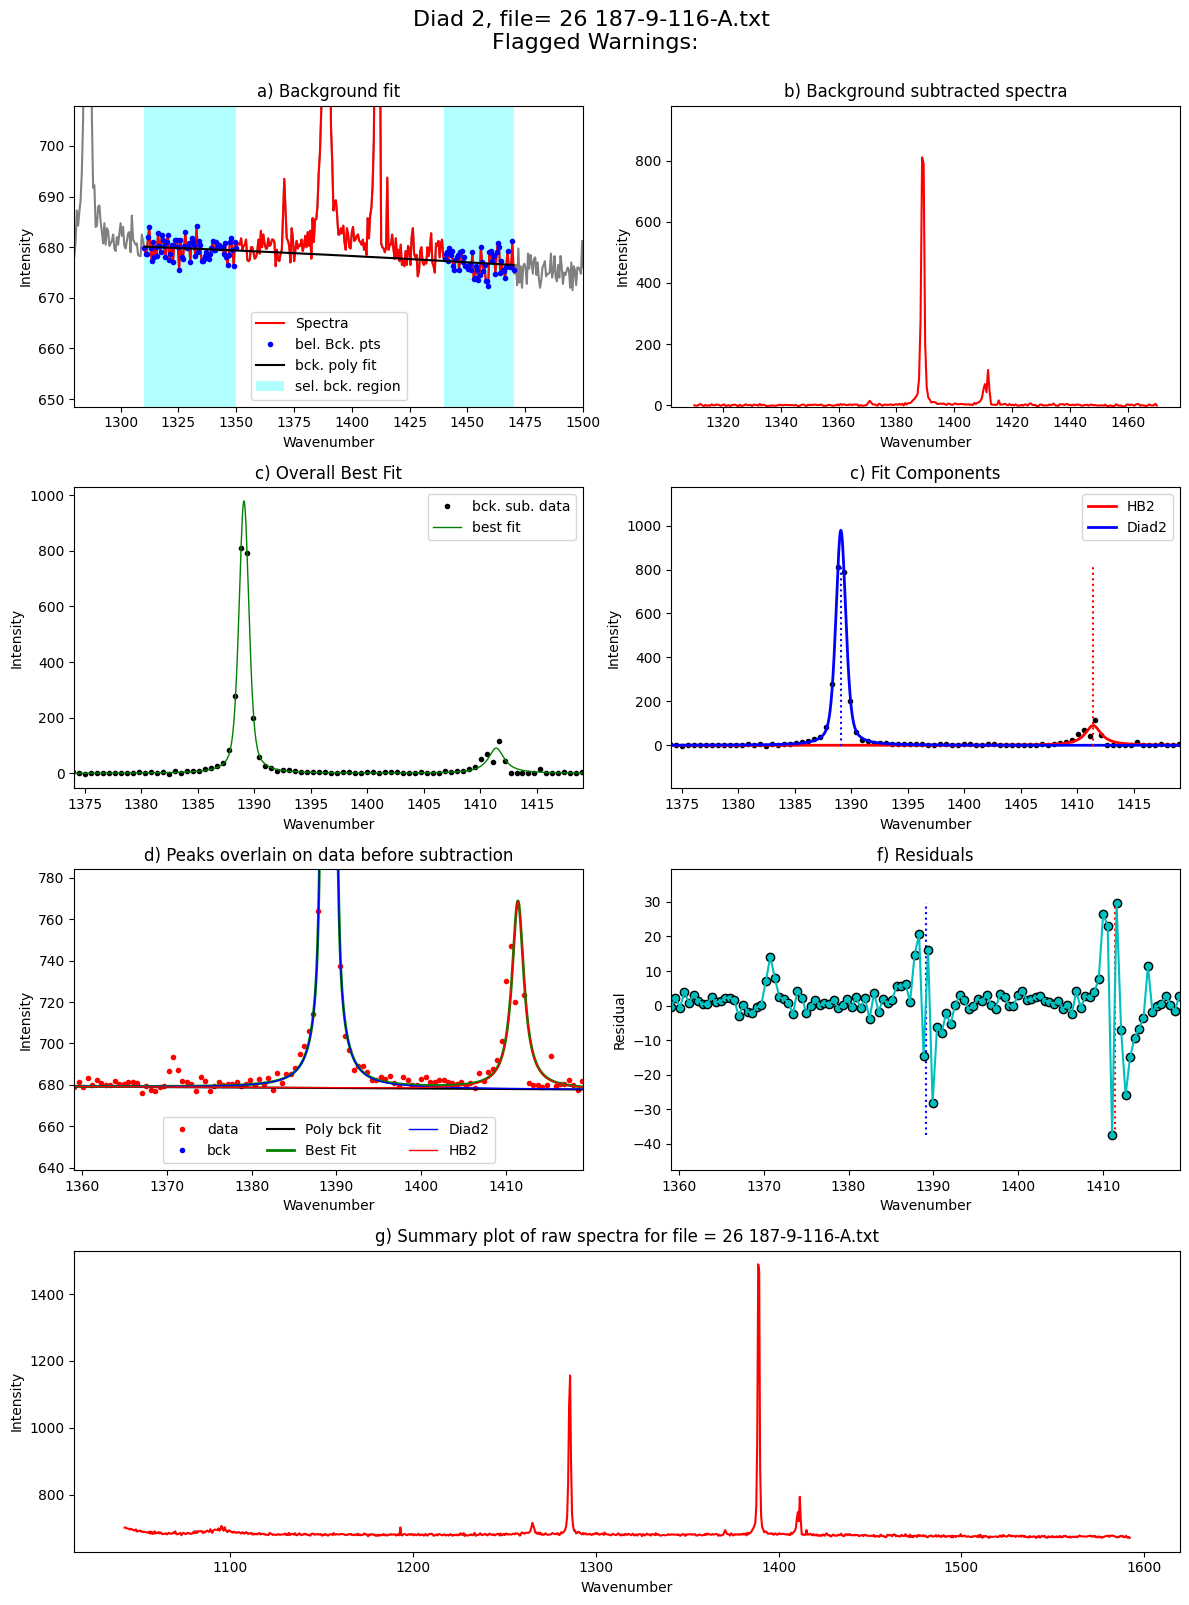

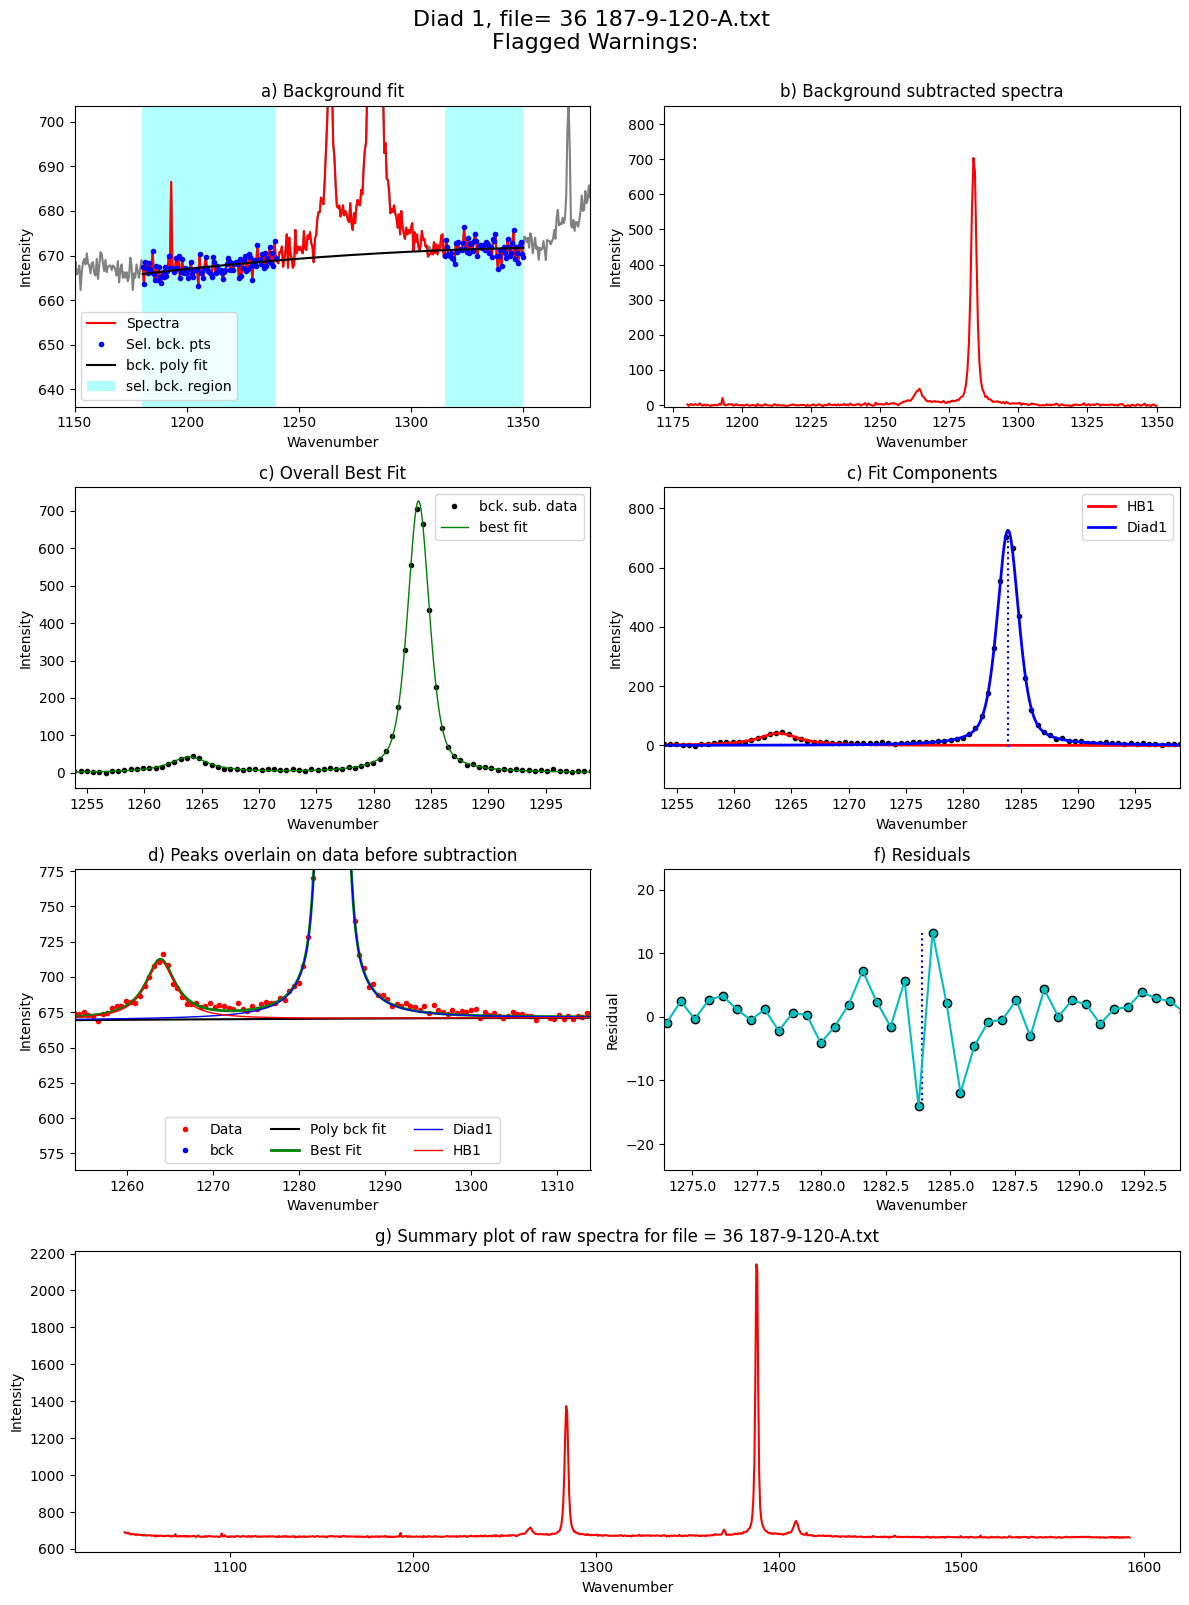

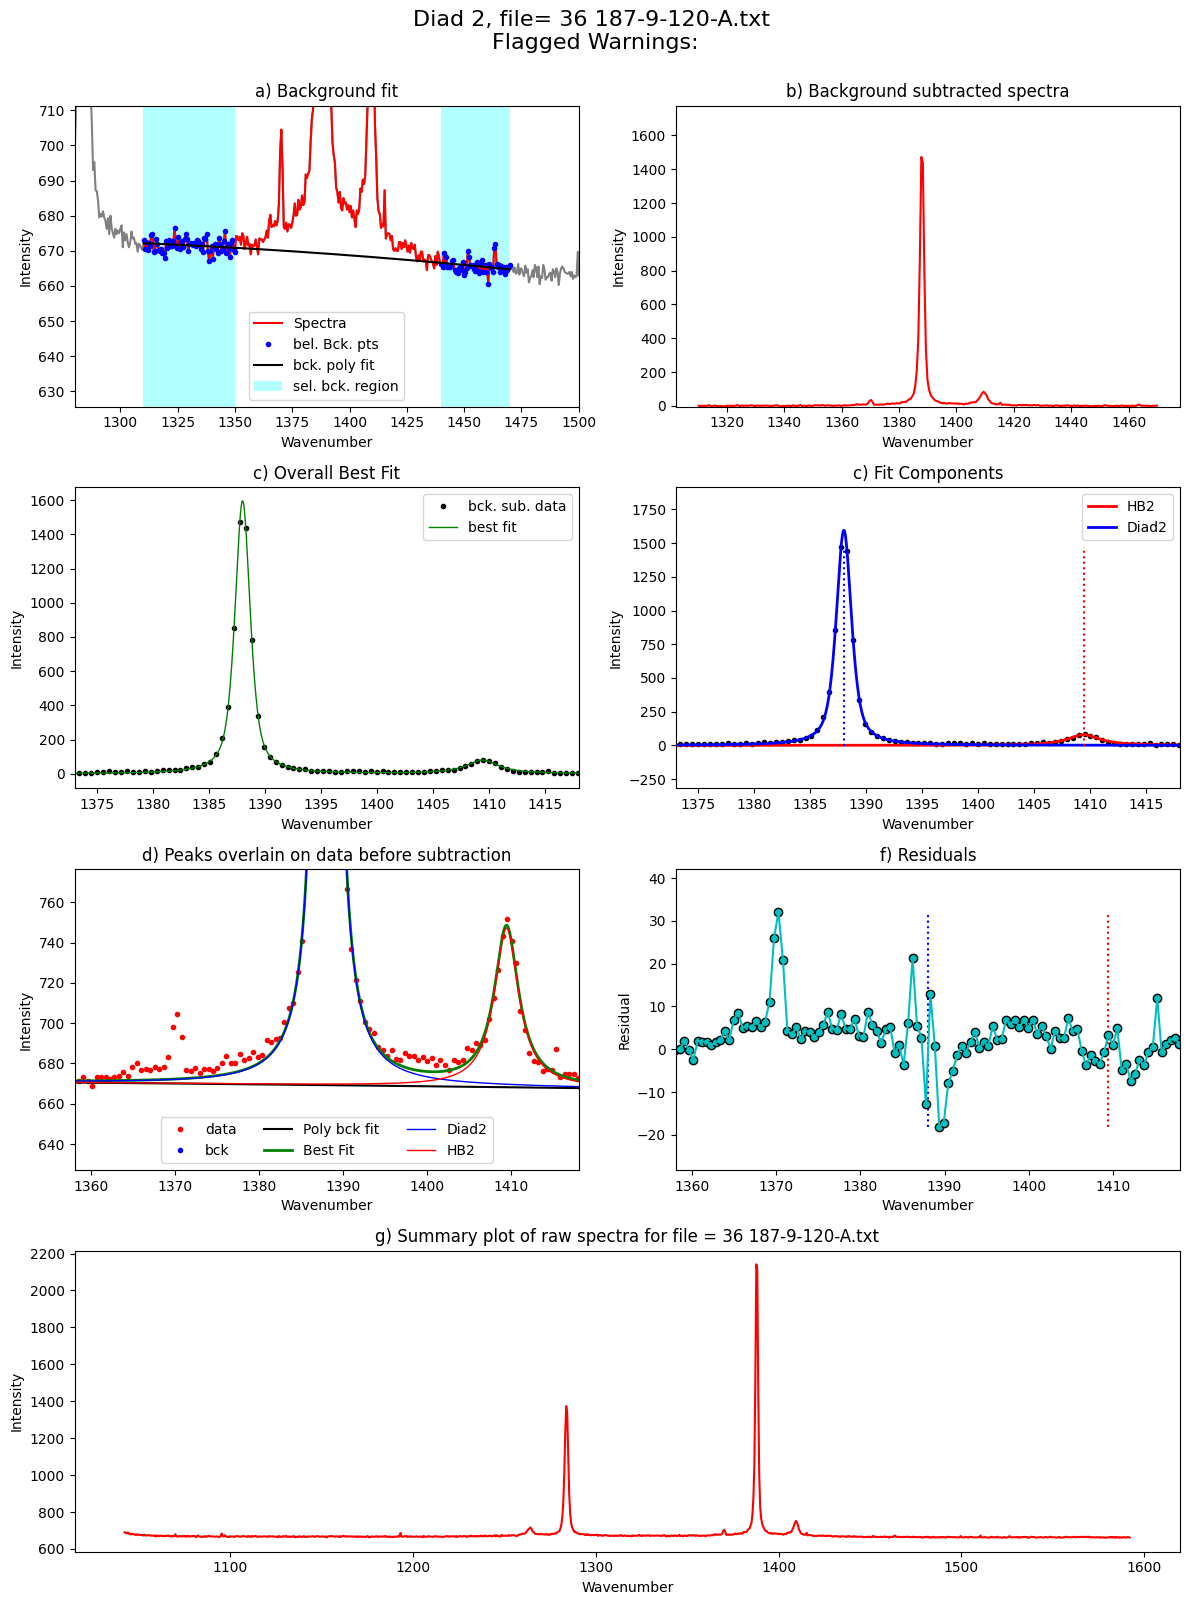

In [70]:
from tqdm import tqdm
plot_figure=True# If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    tqdm.write(f"Processing file: {Diad_Files[i]}")
    
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=spectra_filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config_init.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config_init.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=spectra_filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=prefix, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0).reset_index(drop=True)


In [71]:
# Save parameters to excel
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx', index=False)
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx', index=False)
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx', index=False)

In [72]:
combo

filename   Splitting   Split_σ  Diad1_Combofit_Cent  \
0                 FG19-101-A-rep1  105.174902  0.008025          1281.745743   
1                 FG19-101-A-rep2  105.163929  0.010033          1281.773000   
2     FG19-101-A-rep3_CRR_DiadFit  105.155064  0.011075          1281.802305   
3                    186-11-121-A  103.982932  0.004539          1284.215823   
4                    186-11-121-B  103.784599  0.005488          1284.655666   
5        186-11-121-C_CRR_DiadFit  103.755858  0.004756          1284.725410   
6   186-11-121-D-rep1_CRR_DiadFit  103.841699  0.005410          1284.567052   
7                    186-11-121-E  103.733940  0.011764          1284.758220   
8               186-11-121-D-rep2  103.816445  0.004283          1284.586745   
9                    186-11-122-A  103.789032  0.005440          1284.656206   
10                   186-11-122-B  103.776890  0.008739          1284.626922   
11                    187-9-116-A  103.346348  0.004152          1285.746849   
12                    187-9-120-A  104.124641  0.003725          1283.899025   

    Diad1_cent_err  Diad1_Combofit_Height  Diad1_Voigt_Cent  Diad1_Voigt_Area  \
0         0.007791             562.054271       1281.745743       1660.715592   
1         0.007995             477.736898       1281.773000       1397.472597   
2         0.008871             301.903683       1281.802305        912.250367   
3         0.003858             614.624288       1284.215873       1800.591919   
4         0.004790             461.179117       1284.655716       1242.379141   
5         0.004195             589.864665       1284.725460       1569.092520   
6         0.003890             773.535593       1284.567102       2119.400584   
7         0.010923             268.493671       1284.758220        739.114366   
8         0.003749             805.555324       1284.586795       2187.183424   
9         0.004670             526.985658       1284.656256       1416.002319   
10        0.008126             421.667068       1284.626922       1154.345125   
11        0.003037             506.878180       1285.746899        843.189674   
12        0.003113             726.057904       1283.899075       2166.547784   

    Diad1_Voigt_Sigma  Diad1_Residual  ...  Diad1_Asym50  Diad1_Asym70  \
0            0.959507        5.264060  ...      1.077477      1.030266   
1            0.961269        4.680111  ...      1.160149      1.119078   
2            0.991598        2.876755  ...      1.043029      1.071090   
3            1.110067        2.156719  ...      1.112000      1.128655   
4            1.002935        2.062115  ...      1.283237      1.268126   
5            0.989092        2.664845  ...      1.060606      1.152455   
6            1.034782        3.050967  ...      1.259669      1.258964   
7            1.008677        3.140565  ...      1.209945      1.321727   
8            1.028825        2.939939  ...      1.123050      1.192258   
9            0.994280        2.573851  ...      1.011945      1.149235   
10           0.988588        3.727383  ...      1.159049      1.192563   
11           0.626275        1.957239  ...      1.213068      1.198330   
12           1.125390        2.249782  ...      1.105346      1.096591   

   Diad1_Yuan2017_sym_factor  Diad1_Remigi2021_BSF  Diad2_Asym50  \
0                   0.148680              0.003414      1.060078   
1                   0.307893              0.004024      1.030710   
2                   0.085335              0.006569      1.007380   
3                   0.248655              0.003612      1.105145   
4                   0.568136              0.004349      1.006711   
5                   0.119890              0.003354      1.042353   
6                   0.537401              0.002675      1.018100   
7                   0.423533              0.007514      1.202899   
8                   0.253194              0.002554      1.011312   
9                   0.023754              0.003773  

### This plays a sound when the notebook is done if you have a tendency to procrastinate

In [73]:
# !pip install winotify

from winotify import Notification, audio

toast= Notification(app_id="VSCode",title="Notebook completed",
                    msg="Step3b_Secondary_Peaks is done!",
                    duration="short")
toast.set_audio(audio.Mail,loop=False)
toast.show()